# Roi Polanitzer's final project in the course "Data science, Machine Learning & Deep Learning with Python"

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as ply
import plotly.graph_objects as go
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn import metrics
import warnings
from IPython.display import Image 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from itertools import combinations
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (t

# Credit Decision Overview

Lending institutions all over the world need to classify whether a loan is acceptable (i.e., good) or not (i.e., default) to make their lending decisions. They can do this by relating the outcomes of those loans which were given (1= default, 0= good) to features such as home ownership, annual income, and the debt to income ratio of the credit applicant.


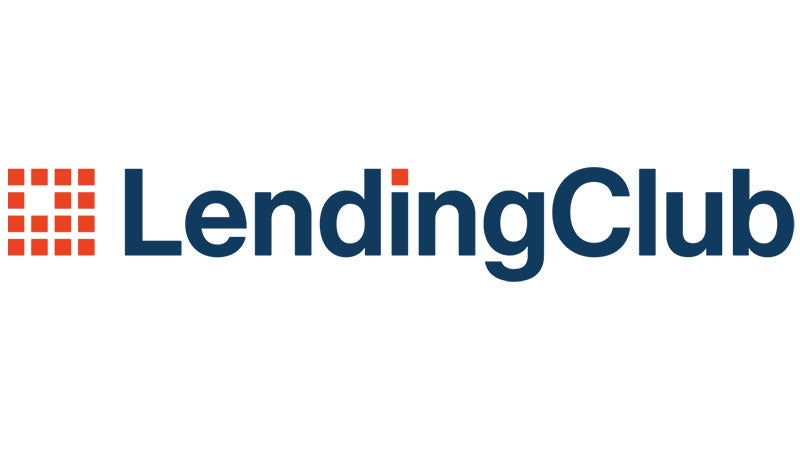

In [2]:
Image(filename='Lending-Club.jpg')

# Problem Statement


## Classification- Predict if a loan given to credit applicant by LendingClub will default (Yes/No)
**Gain insights on the parameters that affect the default of loan given to credit applicant by LendingClub according to various parameters and build a model that predicts if loan was defaulted** <br>


- When the loan amount is higher -> there are more chances to get defaults?
<br>
- When the loan term is longer -> there are more chances to get defaults?
<br>
- When the interest rate is higher -> there are more chances to get defaults?
<br>
- When the monthly payment is lower -> there are more chances to get defaults?
<br>
- How does the applicant's loan purpose affect the loan? If it is for buying a house or for vacation there are more chances to get defaults?
<br>
- When the applicant's employment length is lower -> there are more chances to get defaults?
<br>
- Does the applicant rent or own his own home -> there are more chances to get defaults?
<br>
- When the applicant's annual income is lower -> there are more chances to get defaults?
<br>
- When the applicant's debt to income ratio is higher -> there are more chances to get defaults?
<br>
- and more...
<br>

**Or Maybe we don't have enough information to classify correctly if loan was defaulted and it depends on more feature like, lender character?** <br>

### Classification work flow

1.  Reading the Datasets
2.  Data cleaning
3.  Feature Engineering
4.  Exploratory data analysis
5.  Creating dummy variables
6.  Handling imbalanced data
7.  Split data to Train & Test sets
8.  Sanity check between full data and selected data for prediction
9.  Training & Evaluating different machine learning classification models
10. Comparing several machine learning classification models
11. Training & Evaluating different ensemble learning classification methods
12. Comparing several ensemble learning classification methods
13. Training & Evaluating deep learning classification model
14. Choosing the best model
15. Predict+Evaluate on test set with chosen model
16. Real time predictions
17. Deploymnet



#  The Data 

 * **LendingClub_data.csv** - contains loans records provided by the company Lending Club on its credit decisions.  <br>
 
Lending Club is a peer-to-peer lender that allows investors to lend money to borrowers witout intermediary being involved.

# Data dictionary 
* **LOAN_ID**- The unique Lending Club assigned ID for the loan listing.
* **BORROWER_ID**- The unique Lending Club assigned Id for the borrower member.
* **LOAN_AMOUNT**- The listed amount of the loan applied for by the borrower. 
* **LOAN_TERM**- The number of payments on the loan (36 months or 60 months) 
* **INTEREST_RATE**- The Interest Rate on the loan.
* **MONTHLY_PAYMENT**- The monthly payment owed by the borrower if the loan originates.
* **LOAN_PURPOSE**- A category provided by the borrower for the loan request (debt consolidation, credit card, small business, medical, other, vacation, house, major purchase, home improvement, wedding, car, moving, renewable energy, and educational)
* **EMPLOYMENT LENGTH**- Employment length in years
* **HOUSING**- The home ownership status provided by the borrower during registration or obtained from the credit report. (Yes for Owner/Mortgage and No for Rent)
* **ANNUAL INCOME**-  The self-reported annual income provided by the borrower during registration.
* **DEBT TO INCOME**- The ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested Lending Club loan, divided by the borrower’s self-reported monthly income.
* **DEFAULT**- The current status of the loan (1 if Charged Off/Default 0 if Fully Paid)




# 1. Reading the Datasets

In [3]:
#reading loan df
df= pd.read_csv('Lending_Club.csv')

In [4]:
df.columns

Index(['loan_id', 'borrower_id', 'loan_amount', 'loan_term', 'interest_rate',
       'monthly_payment', 'loan_purpose', 'employment_length', 'housing',
       'annual_income', 'debt_to_income', 'Default'],
      dtype='object')

In [5]:
df.describe().T

count          mean           std       min          25%  \
loan_id          24999.0  8.261503e+05  4.788045e+05      6.00    408558.00   
borrower_id      24999.0  6.083746e+07  3.606363e+07  68400.00  31001076.50   
loan_amount      24999.0  1.468700e+04  8.763621e+03    600.00      8000.00   
interest_rate    24999.0  1.321884e+01  4.741118e+00      5.32         9.76   
monthly_payment  24999.0  4.367890e+02  2.560091e+02     21.59       251.58   
annual_income    24999.0  7.706611e+04  5.497013e+04      0.00     46000.00   
debt_to_income   24999.0  1.860146e+01  1.404300e+01      0.00        12.05   
Default          24999.0  1.022841e-01  3.030276e-01      0.00         0.00   

                         50%           75%           max  
loan_id            824416.00  1.243298e+06  1.646774e+06  
borrower_id      65373097.00  9.124253e+07  6.089031e+08  
loan_amount         12725.00  2.000000e+04  4.000000e+04  
interest_rate          12.74  1.599000e+01  3.099000e+01  
monthly_payment       377.62  5.770350e+02  1.501000e+03  
annual_income       65000.00  9.200000e+04  1.500000e+06  
debt_to_income         17.81  2.427000e+01  9.990000e+02  
Default                 0.00  0.000000e+00  1.000000e+00

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 12 columns):
loan_id              24999 non-null int64
borrower_id          24999 non-null int64
loan_amount          24999 non-null int64
loan_term            24999 non-null object
interest_rate        24999 non-null float64
monthly_payment      24999 non-null float64
loan_purpose         24999 non-null object
employment_length    23497 non-null object
housing              24999 non-null object
annual_income        24999 non-null float64
debt_to_income       24999 non-null float64
Default              24999 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 2.3+ MB


# 2. Data Cleaning

In [7]:
dfColumns=[col.strip().upper() for col in df.columns]
df.columns=dfColumns
print("Lending Club DF with NA values:")
print(df.columns[df.isna().any()].tolist())

Lending Club DF with NA values:
['EMPLOYMENT_LENGTH']


In [8]:
df.columns

Index(['LOAN_ID', 'BORROWER_ID', 'LOAN_AMOUNT', 'LOAN_TERM', 'INTEREST_RATE',
       'MONTHLY_PAYMENT', 'LOAN_PURPOSE', 'EMPLOYMENT_LENGTH', 'HOUSING',
       'ANNUAL_INCOME', 'DEBT_TO_INCOME', 'DEFAULT'],
      dtype='object')

In [9]:
print("Counting NA values per recognized columns with NA:")
print("EMPLOYMENT_LENGTH NA Valus:"+ str(df.EMPLOYMENT_LENGTH.isna().sum()))

Counting NA values per recognized columns with NA:
EMPLOYMENT_LENGTH NA Valus:1502


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 12 columns):
LOAN_ID              24999 non-null int64
BORROWER_ID          24999 non-null int64
LOAN_AMOUNT          24999 non-null int64
LOAN_TERM            24999 non-null object
INTEREST_RATE        24999 non-null float64
MONTHLY_PAYMENT      24999 non-null float64
LOAN_PURPOSE         24999 non-null object
EMPLOYMENT_LENGTH    23497 non-null object
HOUSING              24999 non-null object
ANNUAL_INCOME        24999 non-null float64
DEBT_TO_INCOME       24999 non-null float64
DEFAULT              24999 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 2.3+ MB


In [11]:
# filling recordes with A values
df_loan = df.copy()
df_loan.fillna(method='ffill', inplace=True)
# In Addition removing unnecessary column
df_loan=df_loan.drop(["LOAN_ID","BORROWER_ID"], axis=1)
print("Current columns with NA values")
print(df_loan.columns[df_loan.isna().any()].tolist())
#Removing records where is NA
df_loan=df_loan.dropna()

Current columns with NA values
[]


In [12]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24999 entries, 0 to 24998
Data columns (total 10 columns):
LOAN_AMOUNT          24999 non-null int64
LOAN_TERM            24999 non-null object
INTEREST_RATE        24999 non-null float64
MONTHLY_PAYMENT      24999 non-null float64
LOAN_PURPOSE         24999 non-null object
EMPLOYMENT_LENGTH    24999 non-null object
HOUSING              24999 non-null object
ANNUAL_INCOME        24999 non-null float64
DEBT_TO_INCOME       24999 non-null float64
DEFAULT              24999 non-null int64
dtypes: float64(4), int64(2), object(4)
memory usage: 2.1+ MB


In [13]:

df_loan.describe().style.apply(lambda x: ["background: yellow" if v <= 0  else "" for v in x], axis = 1)


In [14]:
print("LOAN_AMOUNT unique values:"+str(df_loan.LOAN_AMOUNT.unique()))
print("LOAN_TERM unique values:"+str(df_loan.LOAN_TERM.unique()))
print("INTEREST_RATE unique values:"+str(df_loan.INTEREST_RATE.unique()))
print("MONTHLY_PAYMENT unique values:"+str(df_loan.MONTHLY_PAYMENT.unique()))
print("LOAN_PURPOSE unique values:"+str(df_loan.LOAN_PURPOSE.unique()))
print("EMPLOYMENT_LENGTH unique values:"+str(df_loan.EMPLOYMENT_LENGTH.unique()))
print("HOUSING unique values:"+str(df_loan.HOUSING.unique()))
print("ANNUAL_INCOME unique values:"+str(df_loan.ANNUAL_INCOME.unique()))
print("DEBT_TO_INCOME unique values:"+str(df_loan.DEBT_TO_INCOME.unique()))
print("DEFAULT unique values:"+str(df_loan.DEFAULT.unique()))
print("LOAN_AMOUNT values count:")
print(df_loan.LOAN_AMOUNT.value_counts())
print("LOAN_TERM values count:")
print(df_loan.LOAN_TERM.value_counts())
print("LOAN_PURPOSE values count:")
print(df_loan.LOAN_PURPOSE.value_counts())
print("EMPLOYMENT_LENGTH values count:")
print(df_loan.EMPLOYMENT_LENGTH.value_counts())
print("HOUSING values count:")
print(df_loan.HOUSING.value_counts())
print("ANNUAL_INCOME values count:")
print(df_loan.ANNUAL_INCOME.value_counts())
print("DEBT_TO_INCOME values count:")
print(df_loan.DEBT_TO_INCOME.value_counts())
print("DEFAULT values count:")
print(df_loan.DEFAULT.value_counts())

LOAN_AMOUNT unique values:[20000 30000 21500 ... 34700 20575 25300]
LOAN_TERM unique values:[' 60 months' ' 36 months']
INTEREST_RATE unique values:[17.93 11.99 13.67  8.49 30.74 14.08 12.39 12.79 10.16  9.99 11.67  9.93
 15.31 18.99 18.55  7.35 19.19  8.39  7.07 12.74 13.66 19.99 10.99  9.17
 13.99 13.49 14.46 11.39 12.99 11.44 10.75 18.25 10.49 26.24 15.61  6.62
 14.49 16.99 15.41 16.29 14.65  8.24 28.34 13.53 15.99 25.49 11.14 22.91
  8.99 16.55 20.99 14.99 24.49  7.29 13.98 11.49  7.9  12.69 17.77 16.32
 22.35 14.85 22.4  15.59 12.29 25.57 17.99 10.42  9.16  6.92  9.75 15.05
  9.49 20.49 13.33  7.89 20.    7.49 11.53 12.62 13.18 14.31 10.64 21.
 14.33  8.59 12.12  6.97  7.26  7.51  8.67 11.48 10.15  7.97 14.98 16.02
 17.86  7.62 17.57 24.85  5.32 16.59 10.91 13.59  6.24  7.24 13.44  6.99
 25.69 12.61  7.12 19.03 13.11 13.65 24.99  6.03 23.99 19.24 25.88 21.6
  8.19 22.74  7.59 15.8  23.88 10.74 18.06 12.59 25.8  12.49  7.99 20.2
 16.4  26.06 17.27 25.28 13.23  5.42 13.92 20.31 12.8

# 3. Feature Engineering

In [15]:
for i in range (0, len(df_loan['EMPLOYMENT_LENGTH'])):
    if df_loan['EMPLOYMENT_LENGTH'][i] == "< 1 year": 
        df_loan['EMPLOYMENT_LENGTH'][i]= "< 1 year"
    elif df_loan['EMPLOYMENT_LENGTH'][i] == "1 year" or df_loan['EMPLOYMENT_LENGTH'][i] == "2 years": 
        df_loan['EMPLOYMENT_LENGTH'][i]= "1-2 Years"
    elif df_loan['EMPLOYMENT_LENGTH'][i] == "3 years" or df_loan['EMPLOYMENT_LENGTH'][i] == "4 years": 
        df_loan['EMPLOYMENT_LENGTH'][i]= "3-4 Years"
    elif df_loan['EMPLOYMENT_LENGTH'][i] == "5 years" or df_loan['EMPLOYMENT_LENGTH'][i] == "6 years":  
        df_loan['EMPLOYMENT_LENGTH'][i]= "5-6 Years"
    elif df_loan['EMPLOYMENT_LENGTH'][i] == "7 years" or df_loan['EMPLOYMENT_LENGTH'][i] == "8 years":
        df_loan['EMPLOYMENT_LENGTH'][i]= "7-8 Years"
    elif df_loan['EMPLOYMENT_LENGTH'][i] == "9 years" or df_loan['EMPLOYMENT_LENGTH'][i] == "10 years":
        df_loan['EMPLOYMENT_LENGTH'][i]= "9-10 Years"
    else: 
        df_loan['EMPLOYMENT_LENGTH'][i]= ">10 Years"

In [16]:
print("EMPLOYMENT_LENGTH :", df_loan['EMPLOYMENT_LENGTH'].unique())

EMPLOYMENT_LENGTH : ['1-2 Years' '>10 Years' '7-8 Years' '9-10 Years' '5-6 Years' '3-4 Years'
 '< 1 year']


# 4. Exploratory data analysis

In [17]:
df_loan.describe().T

count          mean           std     min       25%  \
LOAN_AMOUNT      24999.0  14687.002480   8763.621362  600.00   8000.00   
INTEREST_RATE    24999.0     13.218843      4.741118    5.32      9.76   
MONTHLY_PAYMENT  24999.0    436.788993    256.009134   21.59    251.58   
ANNUAL_INCOME    24999.0  77066.106339  54970.127344    0.00  46000.00   
DEBT_TO_INCOME   24999.0     18.601464     14.042998    0.00     12.05   
DEFAULT          24999.0      0.102284      0.303028    0.00      0.00   

                      50%        75%         max  
LOAN_AMOUNT      12725.00  20000.000    40000.00  
INTEREST_RATE       12.74     15.990       30.99  
MONTHLY_PAYMENT    377.62    577.035     1501.00  
ANNUAL_INCOME    65000.00  92000.000  1500000.00  
DEBT_TO_INCOME      17.81     24.270      999.00  
DEFAULT              0.00      0.000        1.00

In [18]:
left = df_loan.groupby('DEFAULT')
left.mean()

LOAN_AMOUNT  INTEREST_RATE  MONTHLY_PAYMENT  ANNUAL_INCOME  \
DEFAULT                                                                
0        14627.105427      12.934007       434.614986   77888.128034   
1        15212.700430      15.718756       455.869582   69851.475569   

         DEBT_TO_INCOME  
DEFAULT                  
0             18.406164  
1             20.315549

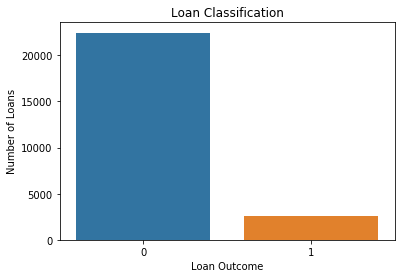

In [19]:
sns.countplot(x='DEFAULT', data=df_loan)
plt.xlabel('Loan Outcome')
plt.ylabel("Number of Loans")
plt.title("Loan Classification")
plt.show()

In [20]:
pd.value_counts(df_loan['DEFAULT'].values,normalize=True)

0    0.897716
1    0.102284
dtype: float64

In [21]:
df_loan['DEFAULT'].value_counts()

0    22442
1     2557
Name: DEFAULT, dtype: int64

In [22]:
df_plot = df_loan['DEFAULT'].value_counts().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['index'],
        y=df_plot['DEFAULT'],
        width = [0.5, 0.5],
        marker=dict(
        color=['blue', 'orange'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "DEFAULT"},
        title='DEFAULT',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
ply.iplot(fig)

There are 22442 no default loans and 2557 default loans in the outcome variables.

In [23]:
count_no_default = len(df_loan[df_loan['DEFAULT']==0])
count_default = len(df_loan[df_loan['DEFAULT']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("percentage of no default is", pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print("percentage of default", pct_of_default*100)

percentage of no default is 89.77159086363454
percentage of default 10.228409136365455


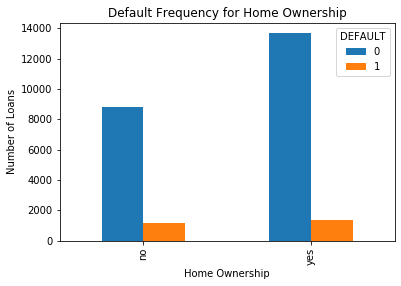

In [24]:
%matplotlib inline
pd.crosstab(df_loan.HOUSING,df_loan.DEFAULT).plot(kind='bar')
plt.title('Default Frequency for Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Loans')
plt.savefig('default_fre_home')

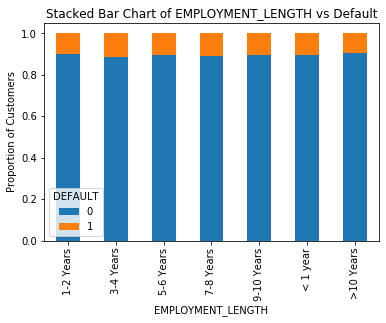

In [25]:
table=pd.crosstab(df_loan['EMPLOYMENT_LENGTH'],df_loan['DEFAULT'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of EMPLOYMENT_LENGTH vs Default')
plt.xlabel('EMPLOYMENT_LENGTH')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

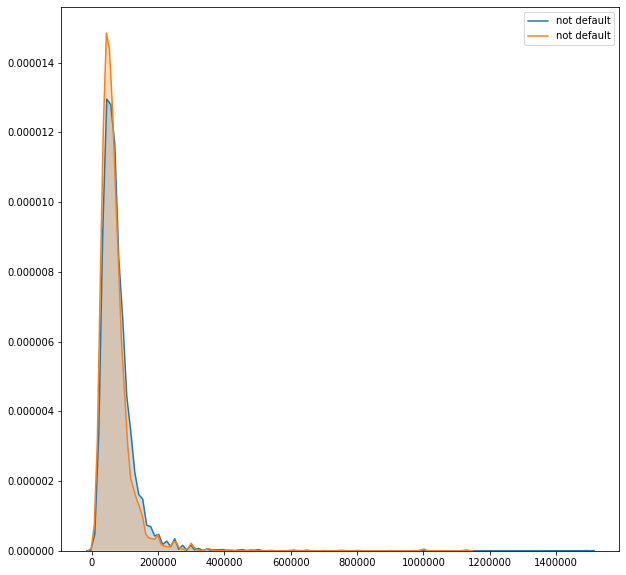

In [26]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(df_loan['ANNUAL_INCOME'].loc[df_loan['DEFAULT'] == 0], label='not default', shade=True);
sns.kdeplot(df_loan['ANNUAL_INCOME'].loc[df_loan['DEFAULT'] == 1], label='not default', shade=True);

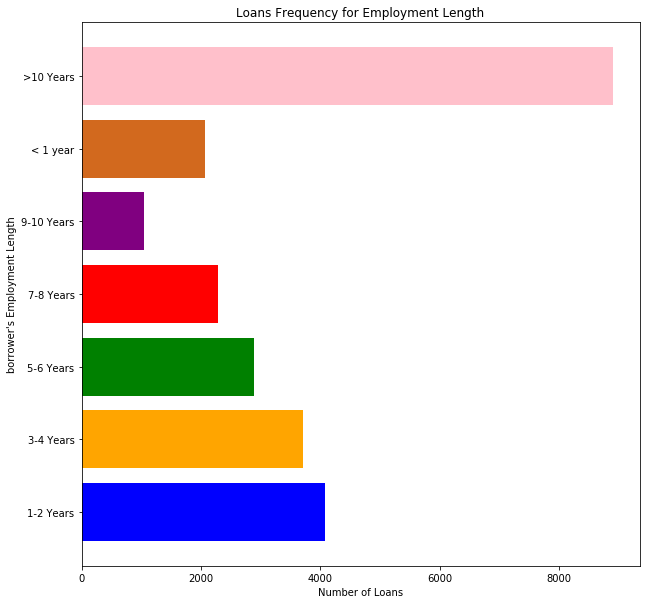

In [27]:
num_projects=df_loan.groupby('EMPLOYMENT_LENGTH').count()
plt.barh(num_projects.index.values, num_projects['LOAN_AMOUNT'], color=['blue', 'orange','green','red','purple','chocolate','pink','grey'])
plt.xlabel('Number of Loans')
plt.ylabel("borrower's Employment Length")
plt.title('Loans Frequency for Employment Length')
plt.show()

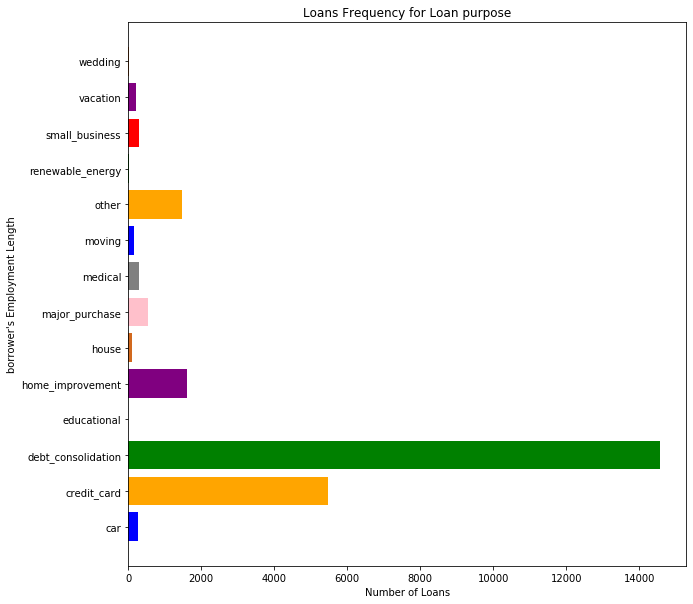

In [28]:
num_projects=df_loan.groupby('LOAN_PURPOSE').count()
plt.barh(num_projects.index.values, num_projects['LOAN_AMOUNT'], color=['blue', 'orange','green','red','purple','chocolate','pink','grey'])
plt.xlabel('Number of Loans')
plt.ylabel("borrower's Employment Length")
plt.title('Loans Frequency for Loan purpose')
plt.show()

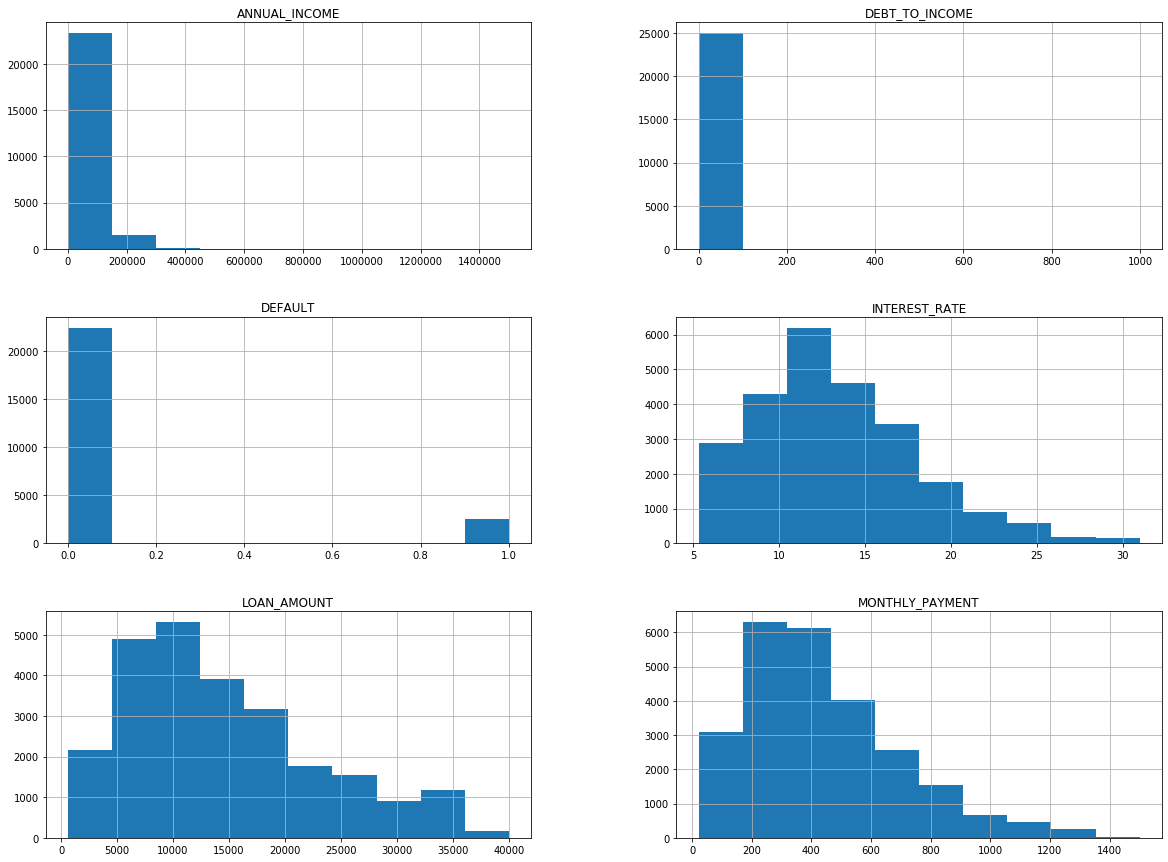

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
df_loan.hist(bins=10, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

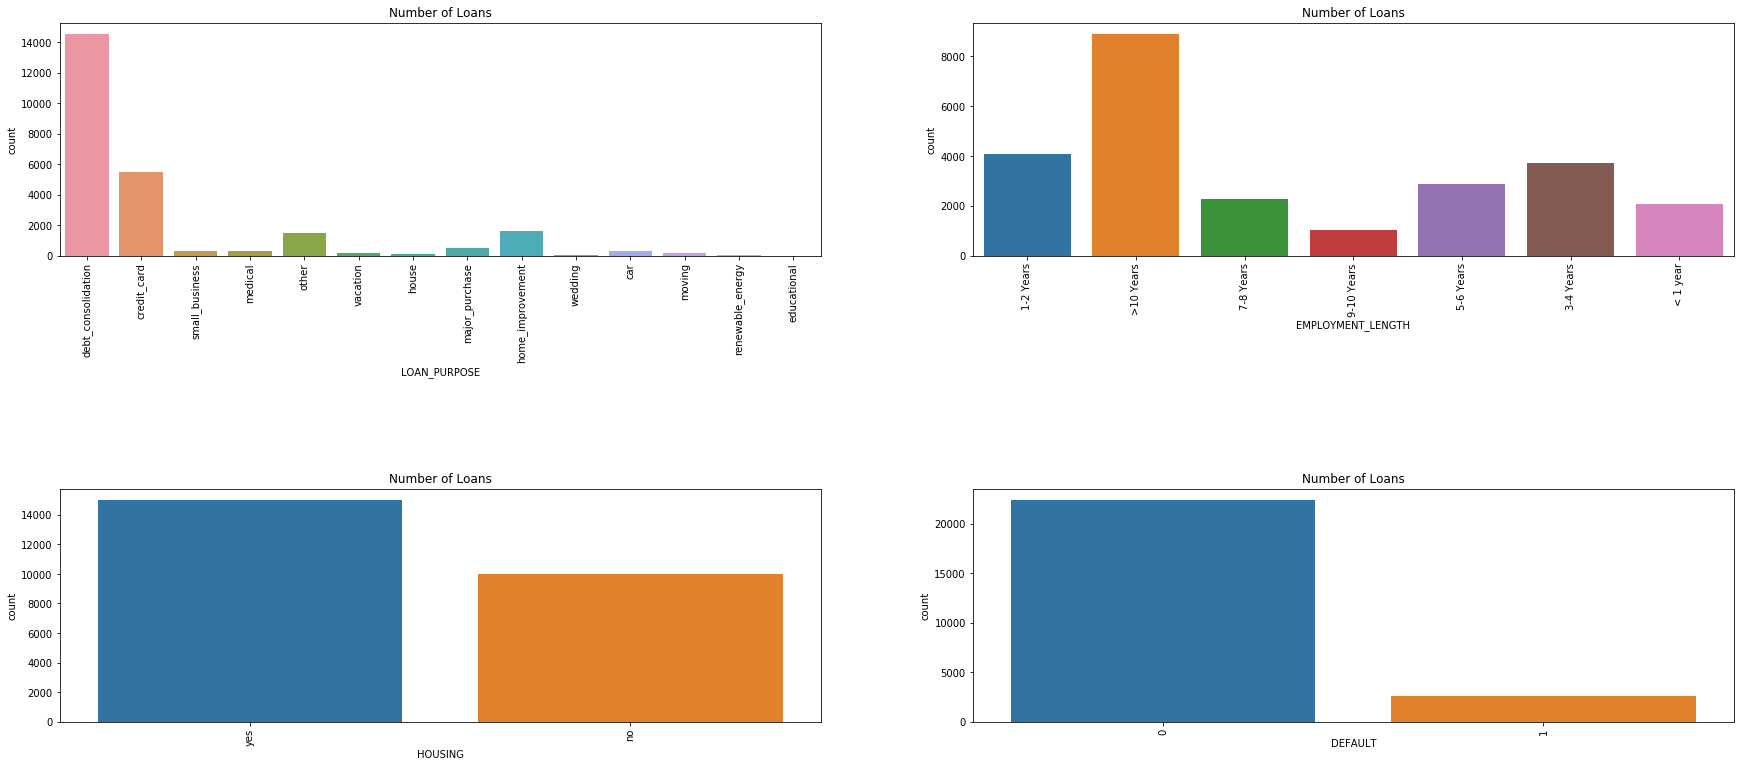

In [30]:
features2=['LOAN_PURPOSE', 'EMPLOYMENT_LENGTH', 'HOUSING', 'DEFAULT']
fig=plt.subplots(figsize=(30,30))
for i, j in enumerate(features2):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df_loan)
    plt.xticks(rotation=90)
    plt.title("Number of Loans")

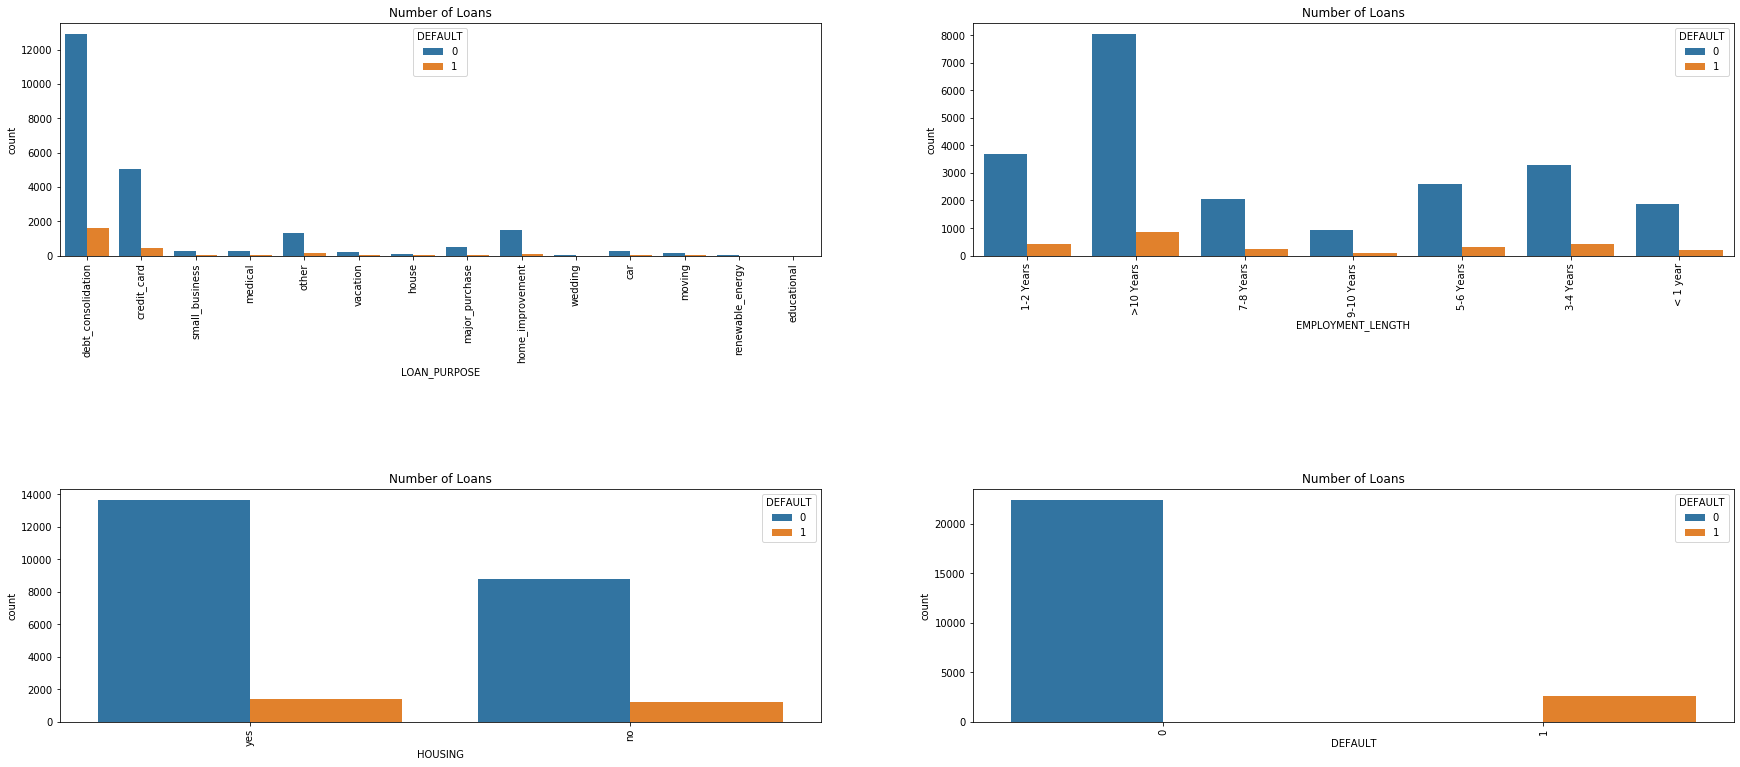

In [31]:
fig=plt.subplots(figsize=(30,30))
for i, j in enumerate(features2):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df_loan, hue='DEFAULT')
    plt.xticks(rotation=90)
    plt.title("Number of Loans")

In [32]:
df_plot = df_loan.groupby('LOAN_AMOUNT').DEFAULT.mean().reset_index()
plot_data = [
    go.Scatter(
        x=df_plot['LOAN_AMOUNT'],
        y=df_plot['DEFAULT'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "DEFAULT"},
        xaxis= {'title': "LOAN_AMOUNT"},
        title='LOAN_AMOUNT vs DEFAULT',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
ply.iplot(fig)

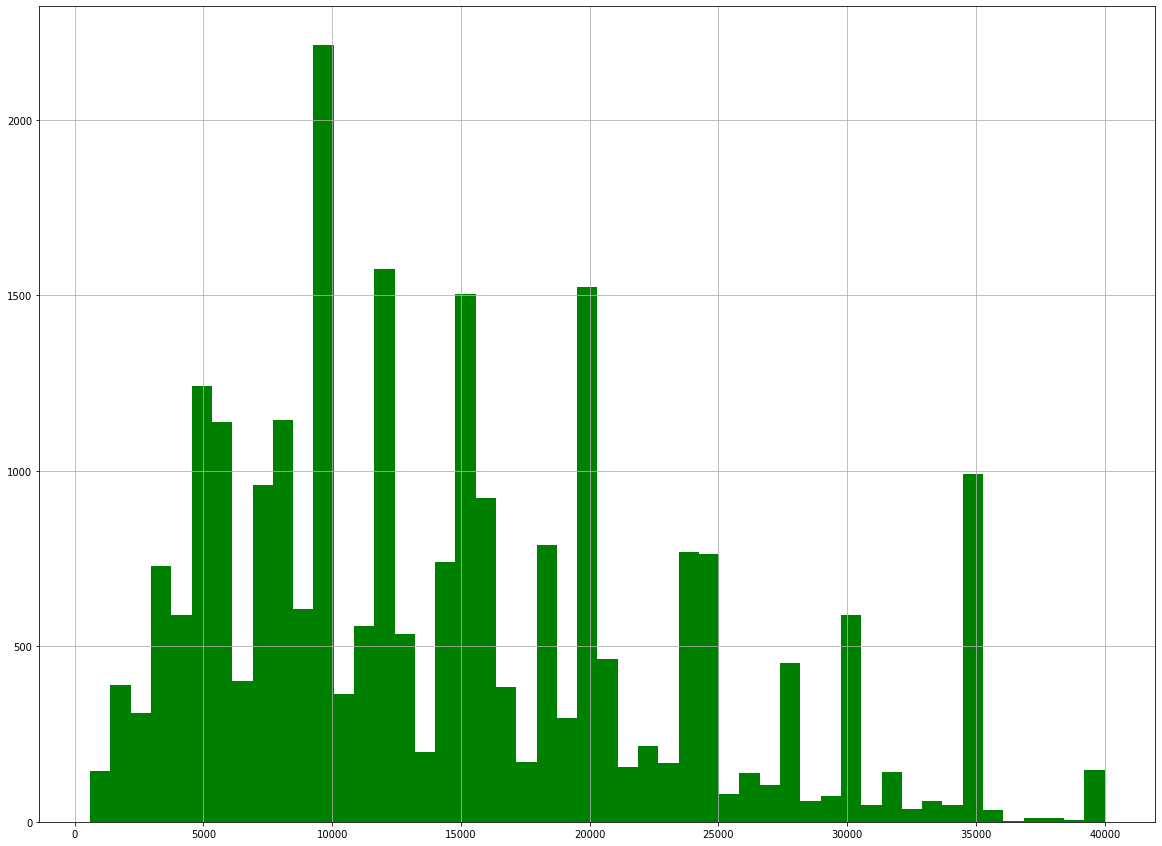

In [33]:
df_loan.LOAN_AMOUNT.hist(bins=50, figsize=(20,15), color=['green'])
plt.savefig("LOAN_AMOUNT_histogram_plot")
plt.show()

Text(0, 0.5, 'DEFAULT mean')

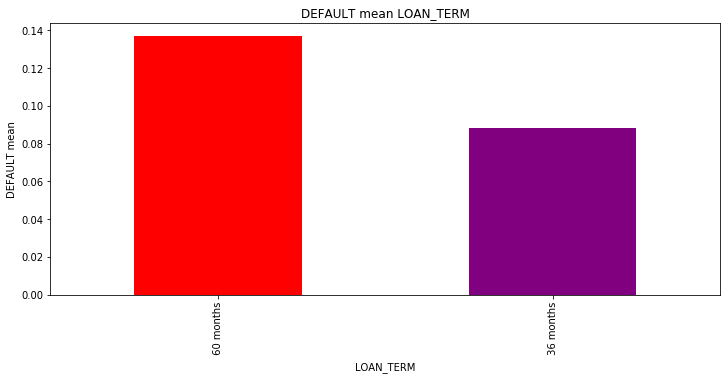

In [34]:
#mean DEFAULT by LOAN_TERM
ax=df_loan.groupby(['LOAN_TERM']).mean().reindex([' 60 months', ' 36 months'])['DEFAULT'].plot.bar(figsize=(12, 5),color=['red','purple'])
ax.set_title('DEFAULT mean LOAN_TERM')
ax.set_ylabel('DEFAULT mean')

In [35]:
df_plot = df_loan.groupby('INTEREST_RATE').DEFAULT.mean().reset_index()
plot_data = [
    go.Scatter(
        x=df_plot['INTEREST_RATE'],
        y=df_plot['DEFAULT'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "DEFAULT"},
        xaxis= {'title': "INTEREST_RATE"},
        title='INTEREST_RATE vs DEFAULT',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
ply.iplot(fig)

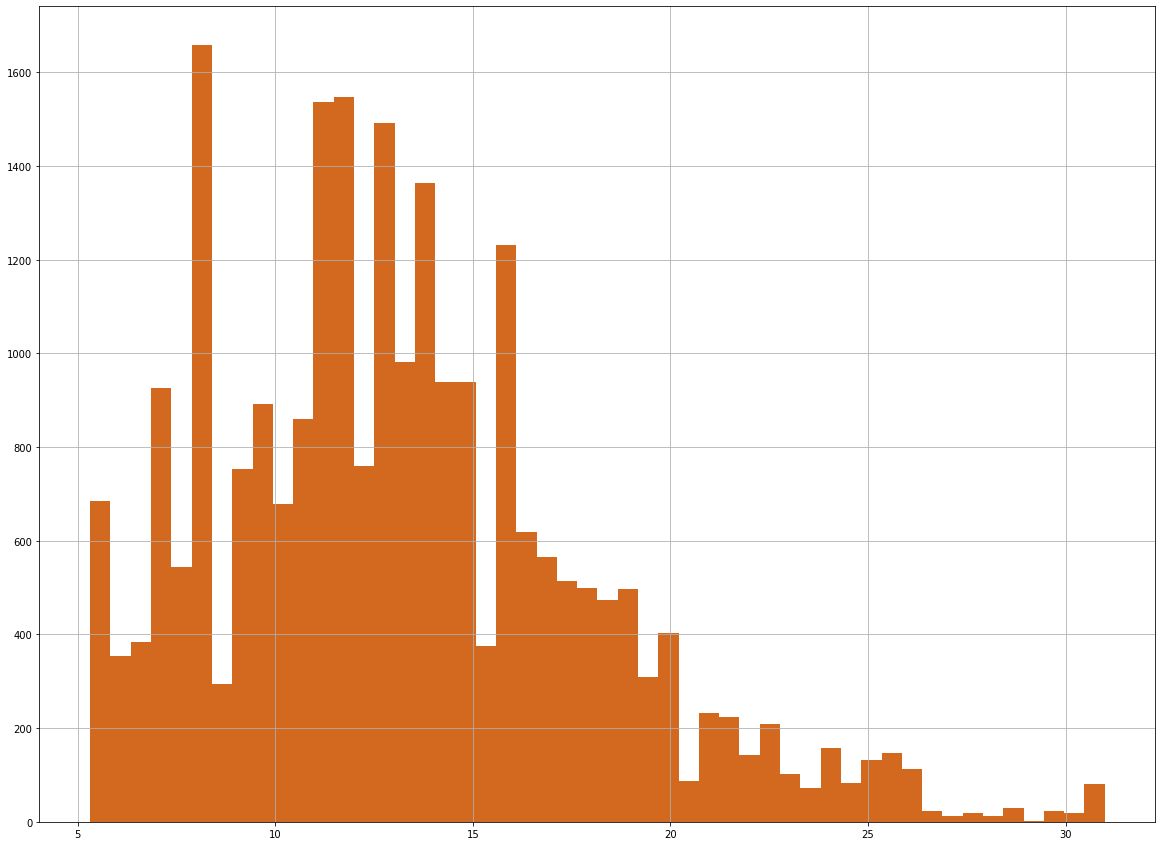

In [36]:
df_loan.INTEREST_RATE.hist(bins=50, figsize=(20,15),color=['chocolate'])
plt.savefig("INTEREST_RATE_histogram_plot")
plt.show()

In [37]:
df_plot = df_loan.groupby('MONTHLY_PAYMENT').DEFAULT.mean().reset_index()
plot_data = [
    go.Scatter(
        x=df_plot['MONTHLY_PAYMENT'],
        y=df_plot['DEFAULT'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "DEFAULT"},
        xaxis= {'title': "MONTHLY_PAYMENT"},
        title='MONTHLY_PAYMENT vs DEFAULT',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
ply.iplot(fig)

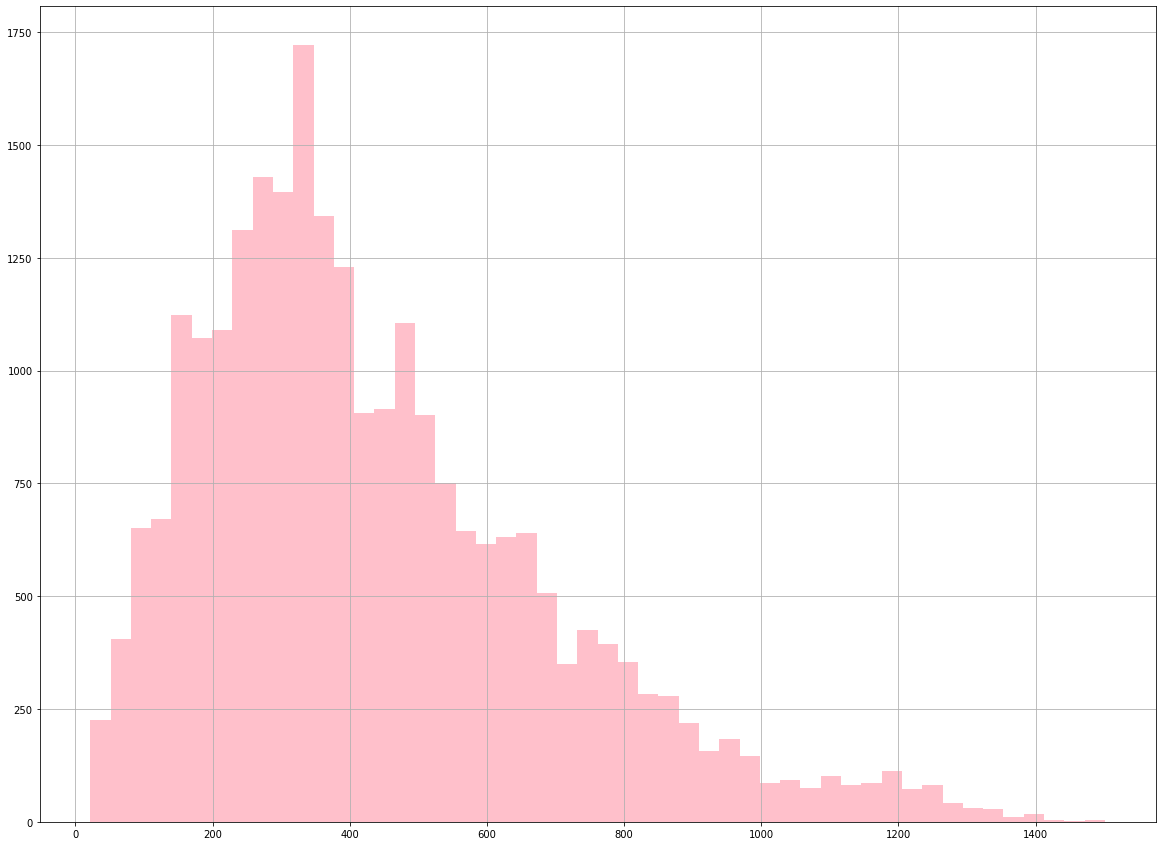

In [38]:
df_loan.MONTHLY_PAYMENT.hist(bins=50, figsize=(20,15),color=['pink'])
plt.savefig("MONTHLY_PAYMENT_histogram_plot")
plt.show()

Text(0, 0.5, 'DEFAULT mean')

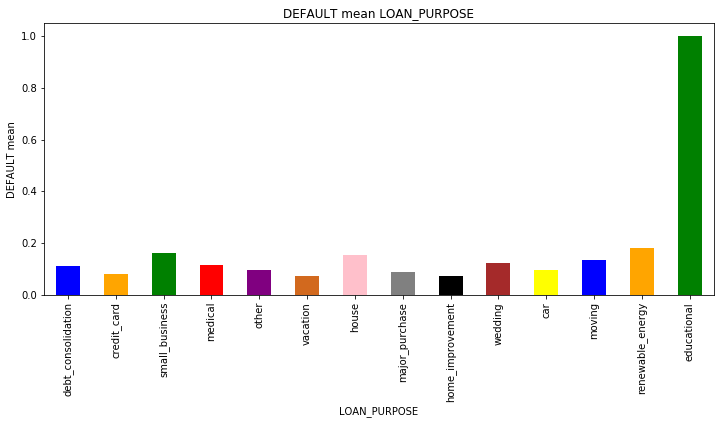

In [39]:
#mean DEFAULT by LOAN_PURPOSE
ax=df_loan.groupby(['LOAN_PURPOSE']).mean().reindex(['debt_consolidation', 'credit_card',\
                                                     'small_business', 'medical', 'other',\
                                                     'vacation', 'house', 'major_purchase',\
                                                     'home_improvement', 'wedding', 'car',\
                                                     'moving', 'renewable_energy', 'educational'])['DEFAULT'].plot.bar(figsize=(12, 5),color=['blue', 'orange','green','red','purple','chocolate','pink','grey','black','brown','yellow'])
ax.set_title('DEFAULT mean LOAN_PURPOSE')
ax.set_ylabel('DEFAULT mean')

Text(0, 0.5, 'DEFAULT mean')

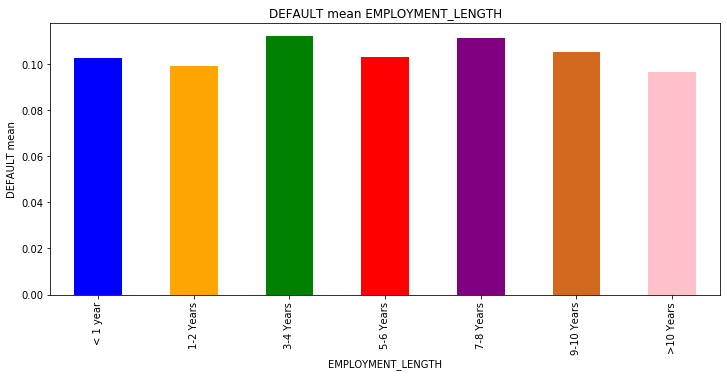

In [40]:
#mean DEFAULT by EMPLOYMENT_LENGTH
ax=df_loan.groupby(['EMPLOYMENT_LENGTH']).mean().reindex(['< 1 year','1-2 Years','3-4 Years',\
                                                          '5-6 Years','7-8 Years','9-10 Years',\
                                                          '>10 Years' 
 ])['DEFAULT'].plot.bar(figsize=(12, 5),color=['blue', 'orange','green','red','purple','chocolate','pink','grey','black','brown','yellow'])
ax.set_title('DEFAULT mean EMPLOYMENT_LENGTH')
ax.set_ylabel('DEFAULT mean')

Text(0, 0.5, 'DEFAULT mean')

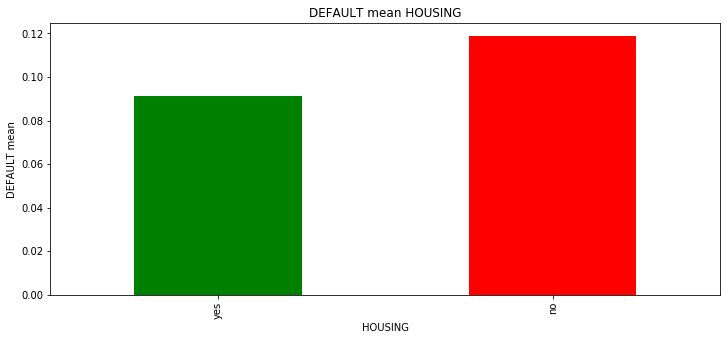

In [41]:
#mean DEFAULT by HOUSING
ax=df_loan.groupby(['HOUSING']).mean().reindex(['yes', 'no'])['DEFAULT'].plot.bar(figsize=(12, 5),color=['green','red'])
ax.set_title('DEFAULT mean HOUSING')
ax.set_ylabel('DEFAULT mean')


In [42]:
df_plot = df_loan.groupby('ANNUAL_INCOME').DEFAULT.mean().reset_index()
plot_data = [
    go.Scatter(
        x=df_plot['ANNUAL_INCOME'],
        y=df_plot['DEFAULT'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "DEFAULT"},
        xaxis= {'title': "ANNUAL_INCOME"},
        title='ANNUAL_INCOME vs DEFAULT',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
ply.iplot(fig)

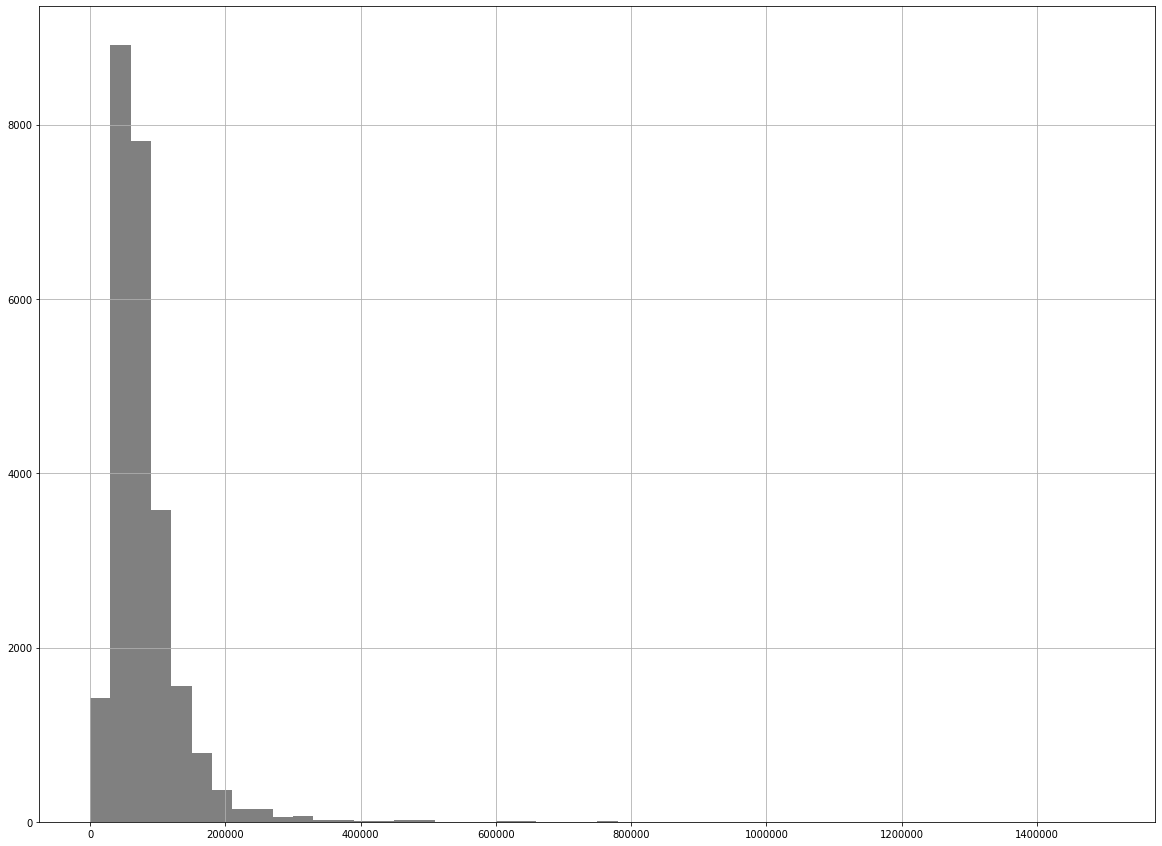

In [43]:
df_loan.ANNUAL_INCOME.hist(bins=50, figsize=(20,15),color=['grey'])
plt.savefig("ANNUAL_INCOME_histogram_plot")
plt.show()

In [44]:
df_plot = df_loan.groupby('DEBT_TO_INCOME').DEFAULT.mean().reset_index()
plot_data = [
    go.Scatter(
        x=df_plot['DEBT_TO_INCOME'],
        y=df_plot['DEFAULT'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]
plot_layout = go.Layout(
        yaxis= {'title': "DEFAULT"},
        xaxis= {'title': "DEBT_TO_INCOME"},
        title='DEBT_TO_INCOME vs DEFAULT',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
ply.iplot(fig)

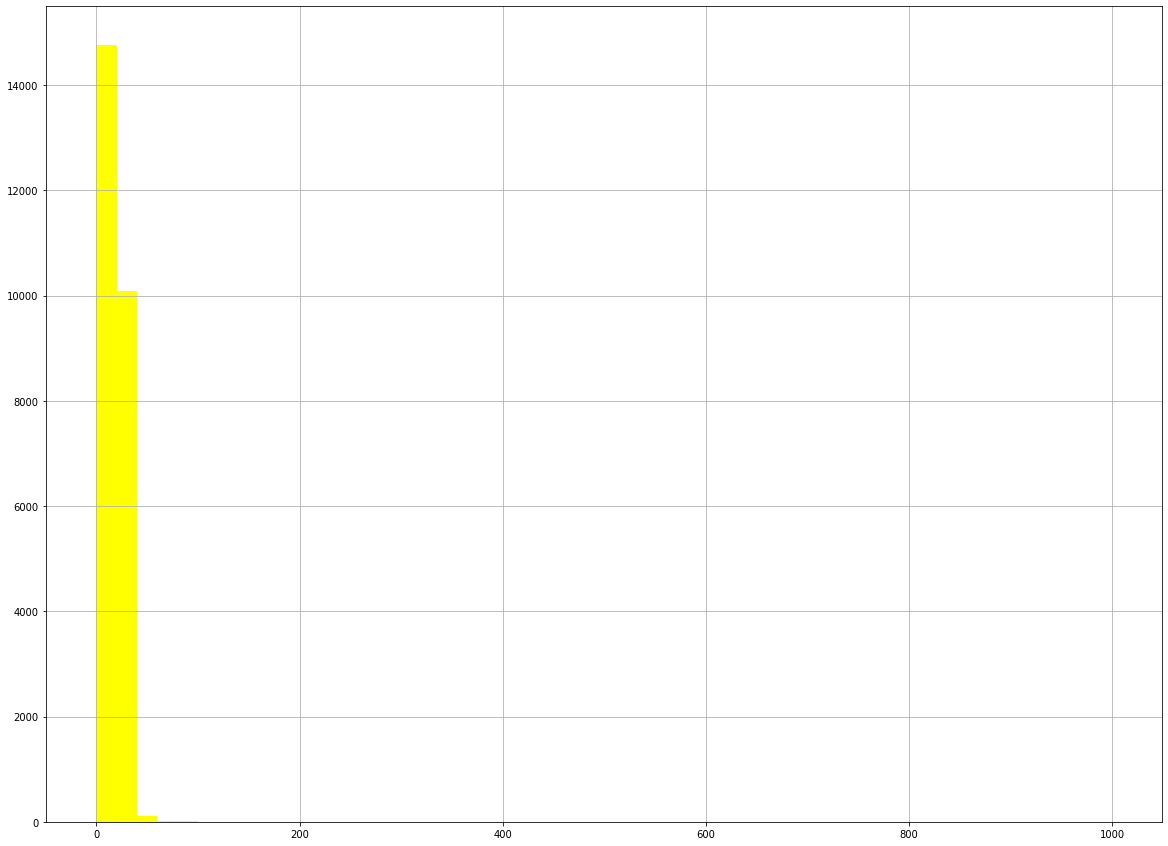

In [45]:
df_loan.DEBT_TO_INCOME.hist(bins=50, figsize=(20,15),color=['yellow'])
plt.savefig("DEBT_TO_INCOME_histogram_plot")
plt.show()

Text(0.5, 1, 'MONTHLY_PAYMENT vs LOAN_AMOUNT by EMPLOYMENT_LENGTH')

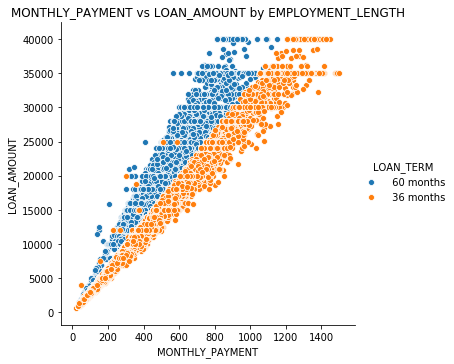

In [46]:
#move down
sns.pairplot(x_vars=['MONTHLY_PAYMENT'], y_vars=['LOAN_AMOUNT'], data=df_loan, hue ="LOAN_TERM", size=5)
plt.title("MONTHLY_PAYMENT vs LOAN_AMOUNT by EMPLOYMENT_LENGTH")

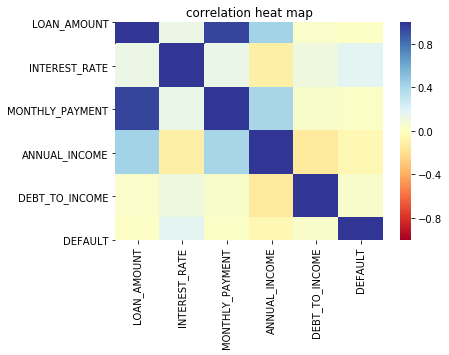

In [47]:
features=['LOAN_AMOUNT', 'LOAN_TERM', 'INTEREST_RATE',
       'MONTHLY_PAYMENT', 'LOAN_PURPOSE', 'EMPLOYMENT_LENGTH', 'HOUSING',
       'ANNUAL_INCOME', 'DEBT_TO_INCOME', 'DEFAULT']
sns.set_style()
corr = df_loan[features].corr()
sns.heatmap(corr,cmap="RdYlBu",vmin=-1,vmax=1)
plt.title("correlation heat map")
plt.show()

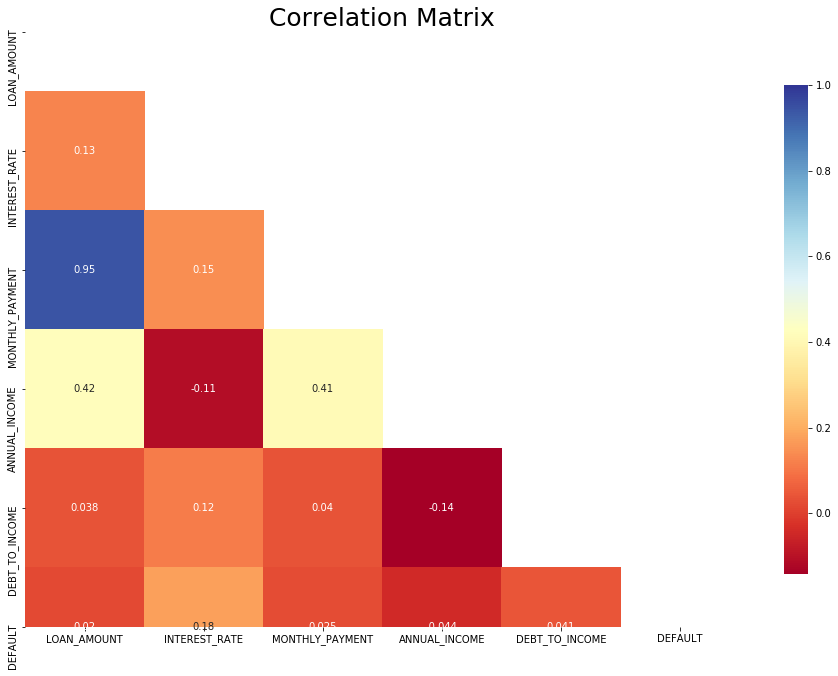

In [48]:
features=['LOAN_AMOUNT', 'LOAN_TERM', 'INTEREST_RATE',
       'MONTHLY_PAYMENT', 'LOAN_PURPOSE', 'EMPLOYMENT_LENGTH', 'HOUSING',
       'ANNUAL_INCOME', 'DEBT_TO_INCOME', 'DEFAULT']
mask = np.zeros_like(df_loan[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix',fontsize=25)

sns.heatmap(df_loan[features].corr(),vmax=1.0,square=True,cmap="RdYlBu", 
            linecolor='w',annot=True,mask=mask,cbar_kws={"shrink": .75})

Now let’s look at how much each independent variable correlates with the DEFAULT.

In [49]:
corr_matrix = df_loan.corr()
corr_matrix["DEFAULT"].sort_values(ascending=False)

DEFAULT            1.000000
INTEREST_RATE      0.177987
DEBT_TO_INCOME     0.041202
MONTHLY_PAYMENT    0.025158
LOAN_AMOUNT        0.020249
ANNUAL_INCOME     -0.044303
Name: DEFAULT, dtype: float64

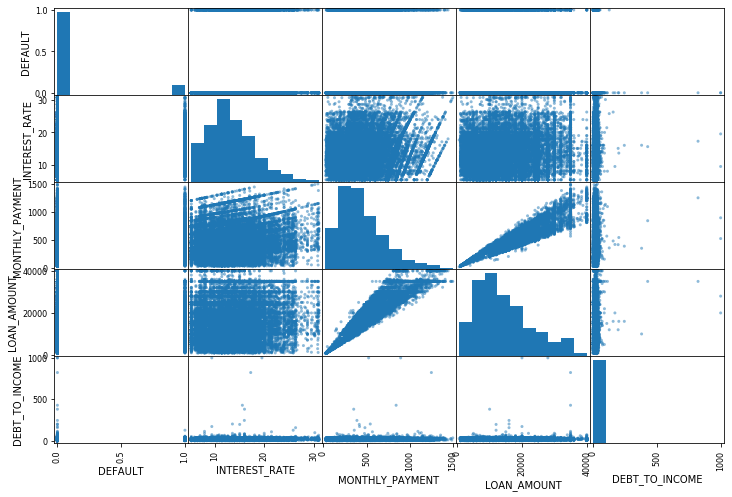

In [50]:
attributes = ["DEFAULT", "INTEREST_RATE", "MONTHLY_PAYMENT",'LOAN_AMOUNT','DEBT_TO_INCOME']
scatter_matrix(df_loan[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

# 5. Creating dummy variables

Create dummy variables for four categorical variables.

In [51]:
df_loan_dummies=pd.get_dummies(df_loan,columns=['LOAN_TERM','LOAN_PURPOSE','EMPLOYMENT_LENGTH', 'HOUSING'])
df_loan_dummies.head().T 


0          1         2         3  \
LOAN_AMOUNT                      20000.00   30000.00  21500.00  10000.00   
INTEREST_RATE                       17.93      11.99     11.99     13.67   
MONTHLY_PAYMENT                    342.94     996.29    714.01    340.18   
ANNUAL_INCOME                    44304.00  136000.00  50000.00  64400.00   
DEBT_TO_INCOME                      18.47      20.63     29.62     16.68   
DEFAULT                              1.00       0.00      0.00      0.00   
LOAN_TERM_ 36 months                 0.00       1.00      1.00      1.00   
LOAN_TERM_ 60 months                 1.00       0.00      0.00      0.00   
LOAN_PURPOSE_car                     0.00       0.00      0.00      0.00   
LOAN_PURPOSE_credit_card             0.00       0.00      0.00      0.00   
LOAN_PURPOSE_debt_consolidation      1.00       1.00      1.00      1.00   
LOAN_PURPOSE_educational             0.00       0.00      0.00      0.00   
LOAN_PURPOSE_home_improvement        0.00       0.00      0.00      0.00   
LOAN_PURPOSE_house                   0.00       0.00      0.00      0.00   
LOAN_PURPOSE_major_purchase          0.00       0.00      0.00      0.00   
LOAN_PURPOSE_medical                 0.00       0.00      0.00      0.00   
LOAN_PURPOSE_moving                  0.00       0.00      0.00      0.00   
LOAN_PURPOSE_other                   0.00       0.00      0.00      0.00   
LOAN_PURPOSE_renewable_energy        0.00       0.00      0.00      0.00   
LOAN_PURPOSE_small_business          0.00       0.00      0.00      0.00   
LOAN_PURPOSE_vacation                0.00       0.00      0.00      0.00   
LOAN_PURPOSE_wedding                 0.00       0.00      0.00      0.00   
EMPLOYMENT_LENGTH_1-2 Years          1.00       0.00      1.00      1.00   
EMPLOYMENT_LENGTH_3-4 Years          0.00       0.00      0.00      0.00   
EMPLOYMENT_LENGTH_5-6 Years          0.00       0.00      0.00      0.00   
EMPLOYMENT_LENGTH_7-8 Years          0.00       0.00      0.00      0.00   
EMPLOYMENT_LENGTH_9-10 Years         0.00       0.00      0.00      0.00   
EMPLOYMENT_LENGTH_< 1 year           0.00       0.00      0.00      0.00   
EMPLOYMENT_LENGTH_>10 Years          0.00       1.00      0.00      0.00   
HOUSING_no                           0.00       0.00      1.00      1.00   
HOUSING_yes                          1.00       1.00      0.00      0.00   

                                        4  
LOAN_AMOUNT                       5000.00  
INTEREST_RATE                        8.49  
MONTHLY_PAYMENT                    157.82  
ANNUAL_INCOME                    88000.00  
DEBT_TO_INCOME                       5.32  
DEFAULT                              0.00  
LOAN_TERM_ 36 months                 1.00  
LOAN_TERM_ 60 months                 0.00  
LOAN_PURPOSE_car                     0.00  
LOAN_PURPOSE_credit_card             0.00  
LOAN_PURPOSE_debt_consolidation      1.00  
LOAN_PURPOSE_educational             0.00  
LOAN_PURPOSE_home_improvement        0.00  
LOAN_PURPOSE_house                   0.00  
LOAN_PURPOSE_major_purchase          0.00  
LOAN_PURPOSE_medical                 0.00  
LOAN_PURPOSE_moving                  0.00  
LOAN_PURPOSE_other                   0.00  
LOAN_PURPOSE_renewable_energy        0.00  
LOAN_PURPOSE_small_business          0.00  
LOAN_PURPOSE_vacation                0.00  
LOAN_PURPOSE_wedding                 0.00  
EMPLOYMENT_LENGTH_1-2 Years          0.00  
EMPLOYMENT_LENGTH_3-4 Years          0.00  
EMPLOYMENT_LENGTH_5-6 Years          0.00  
EMPLOYMENT_LENGTH_7-8 Years          0.00  
EMPLOYMENT_LENGTH_9-10 Years         0.00  
EMPLOYMENT_LENGTH_< 1 year           0.00  
EMPLOYMENT_LENGTH_>10 Years          1.00  
HOUSING_no                           0.00  
HOUSING_yes                          1.00

In [52]:
df_loan_dummies.to_csv("df_loan_dummies.csv",index=False)

In [53]:
df_loan_dummies.columns

Index(['LOAN_AMOUNT', 'INTEREST_RATE', 'MONTHLY_PAYMENT', 'ANNUAL_INCOME',
       'DEBT_TO_INCOME', 'DEFAULT', 'LOAN_TERM_ 36 months',
       'LOAN_TERM_ 60 months', 'LOAN_PURPOSE_car', 'LOAN_PURPOSE_credit_card',
       'LOAN_PURPOSE_debt_consolidation', 'LOAN_PURPOSE_educational',
       'LOAN_PURPOSE_home_improvement', 'LOAN_PURPOSE_house',
       'LOAN_PURPOSE_major_purchase', 'LOAN_PURPOSE_medical',
       'LOAN_PURPOSE_moving', 'LOAN_PURPOSE_other',
       'LOAN_PURPOSE_renewable_energy', 'LOAN_PURPOSE_small_business',
       'LOAN_PURPOSE_vacation', 'LOAN_PURPOSE_wedding',
       'EMPLOYMENT_LENGTH_1-2 Years', 'EMPLOYMENT_LENGTH_3-4 Years',
       'EMPLOYMENT_LENGTH_5-6 Years', 'EMPLOYMENT_LENGTH_7-8 Years',
       'EMPLOYMENT_LENGTH_9-10 Years', 'EMPLOYMENT_LENGTH_< 1 year',
       'EMPLOYMENT_LENGTH_>10 Years', 'HOUSING_no', 'HOUSING_yes'],
      dtype='object')

# 6. Split data to Train & Test sets

In [54]:
X = df_loan_dummies.drop("DEFAULT",axis=1)
y = df_loan_dummies["DEFAULT"]
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47, stratify=y)

# 7. Handling imbalanced data

## 7.1 Checking the balance 

In [55]:
df_loan_dummies["DEFAULT"].value_counts()

0    22442
1     2557
Name: DEFAULT, dtype: int64

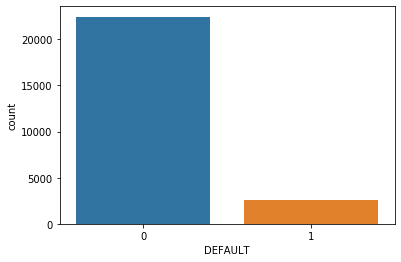

In [56]:
sns.countplot(x="DEFAULT",data=df_loan_dummies)
plt.show()

In [57]:
count_no_default = len(df_loan_dummies[df_loan_dummies['DEFAULT']==0])
count_default = len(df_loan_dummies[df_loan_dummies['DEFAULT']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("\033[1m percentage of no default is", pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print("\033[1m percentage of default", pct_of_default*100)

 percentage of no default is 89.77159086363454
 percentage of default 10.228409136365455


Our classes are imbalanced, and the ratio of no-default to default instances is 90:10.

## 7.2 Over-sampling using SMOTE

With our training data created, I’ll up-sample the default using the SMOTE algorithm (Synthetic Minority Oversampling Technique). At a high level, SMOTE:

1. Works by creating synthetic samples from the minor class (default) instead of creating copies.
2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

We are going to implement SMOTE in Python.

In [58]:
os = SMOTE(random_state=47)
columns1 = X.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns1)
os_data_y= pd.DataFrame(data=os_data_y,columns=['DEFAULT'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no default in oversampled data",len(os_data_y[os_data_y['DEFAULT']==0]))
print("Number of default",len(os_data_y[os_data_y['DEFAULT']==1]))
print("Proportion of no default data in oversampled data is ",len(os_data_y[os_data_y['DEFAULT']==0])/len(os_data_X))
print("Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['DEFAULT']==1])/len(os_data_X))

length of oversampled data is  30072
Number of no default in oversampled data 15036
Number of default 15036
Proportion of no default data in oversampled data is  0.5
Proportion of default data in oversampled data is  0.5


In [59]:
cols=columns1

In [60]:
X_train=os_data_X[cols]
y_train=os_data_y['DEFAULT']

In [61]:
X_train.columns

Index(['LOAN_AMOUNT', 'INTEREST_RATE', 'MONTHLY_PAYMENT', 'ANNUAL_INCOME',
       'DEBT_TO_INCOME', 'LOAN_TERM_ 36 months', 'LOAN_TERM_ 60 months',
       'LOAN_PURPOSE_car', 'LOAN_PURPOSE_credit_card',
       'LOAN_PURPOSE_debt_consolidation', 'LOAN_PURPOSE_educational',
       'LOAN_PURPOSE_home_improvement', 'LOAN_PURPOSE_house',
       'LOAN_PURPOSE_major_purchase', 'LOAN_PURPOSE_medical',
       'LOAN_PURPOSE_moving', 'LOAN_PURPOSE_other',
       'LOAN_PURPOSE_renewable_energy', 'LOAN_PURPOSE_small_business',
       'LOAN_PURPOSE_vacation', 'LOAN_PURPOSE_wedding',
       'EMPLOYMENT_LENGTH_1-2 Years', 'EMPLOYMENT_LENGTH_3-4 Years',
       'EMPLOYMENT_LENGTH_5-6 Years', 'EMPLOYMENT_LENGTH_7-8 Years',
       'EMPLOYMENT_LENGTH_9-10 Years', 'EMPLOYMENT_LENGTH_< 1 year',
       'EMPLOYMENT_LENGTH_>10 Years', 'HOUSING_no', 'HOUSING_yes'],
      dtype='object')

# 8. Sanity check between full data and selected data for prediction

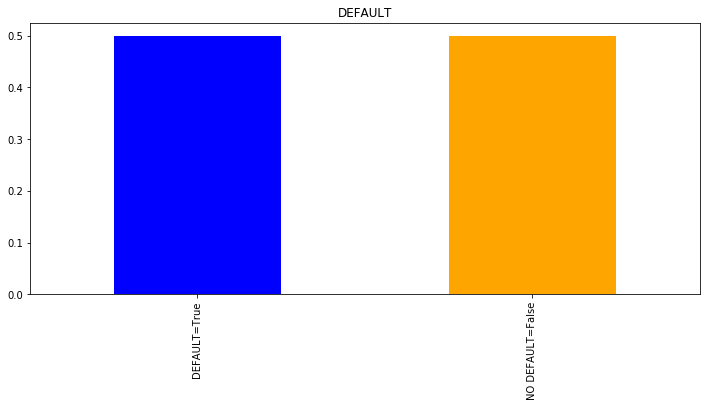

In [62]:
ax=pd.value_counts(y_train.values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','orange'])
ax.set_title('DEFAULT')
ax.set_xticklabels(['DEFAULT=True','NO DEFAULT=False'])
plt.show()

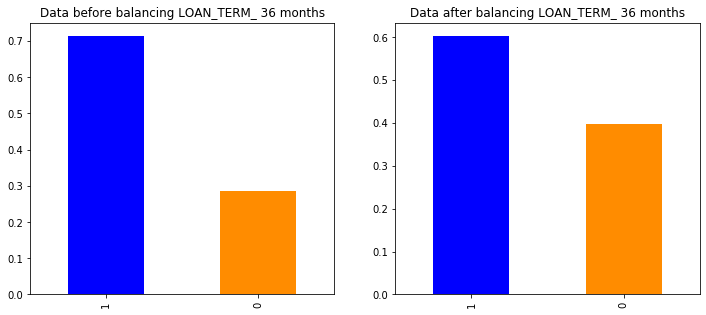

In [63]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before balancing LOAN_TERM_ 36 months")
pd.value_counts(df_loan_dummies['LOAN_TERM_ 36 months'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing LOAN_TERM_ 36 months")
pd.value_counts(X_train['LOAN_TERM_ 36 months'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

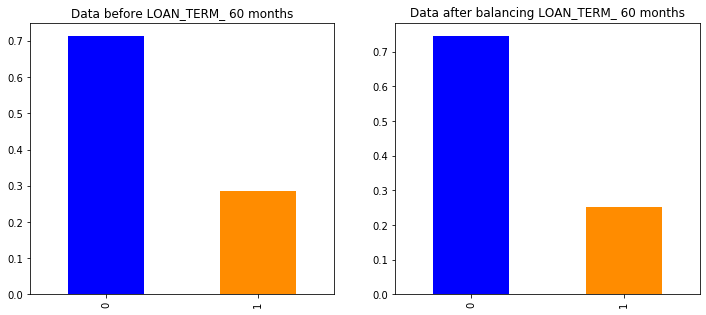

In [64]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before LOAN_TERM_ 60 months")
pd.value_counts(df_loan_dummies['LOAN_TERM_ 60 months'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing LOAN_TERM_ 60 months")
pd.value_counts(X_train['LOAN_TERM_ 60 months'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

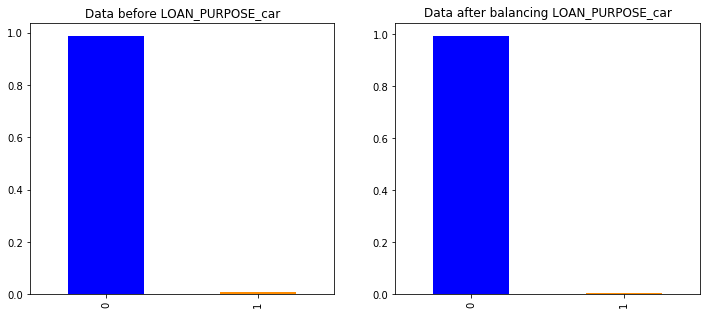

In [65]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before LOAN_PURPOSE_car")
pd.value_counts(df_loan_dummies['LOAN_PURPOSE_car'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing LOAN_PURPOSE_car")
pd.value_counts(X_train['LOAN_PURPOSE_car'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

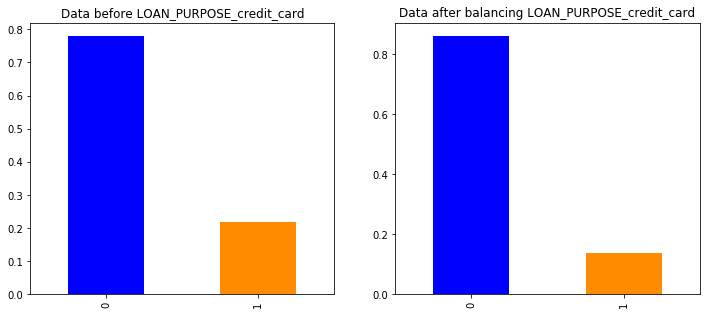

In [66]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before LOAN_PURPOSE_credit_card")
pd.value_counts(df_loan_dummies['LOAN_PURPOSE_credit_card'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing LOAN_PURPOSE_credit_card")
pd.value_counts(X_train['LOAN_PURPOSE_credit_card'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

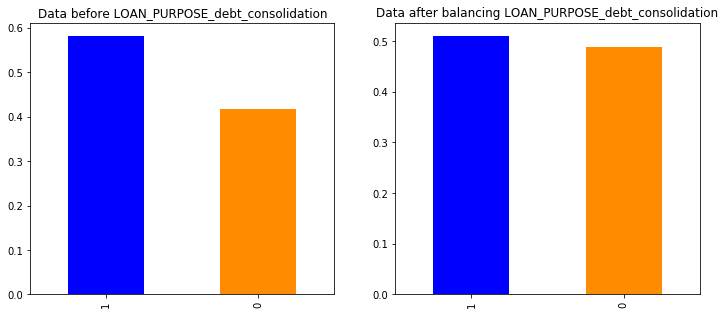

In [67]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before LOAN_PURPOSE_debt_consolidation")
pd.value_counts(df_loan_dummies['LOAN_PURPOSE_debt_consolidation'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing LOAN_PURPOSE_debt_consolidation")
pd.value_counts(X_train['LOAN_PURPOSE_debt_consolidation'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

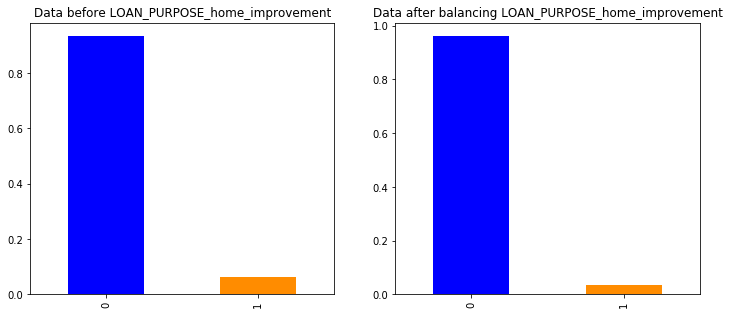

In [68]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before LOAN_PURPOSE_home_improvement")
pd.value_counts(df_loan_dummies['LOAN_PURPOSE_home_improvement'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing LOAN_PURPOSE_home_improvement")
pd.value_counts(X_train['LOAN_PURPOSE_home_improvement'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

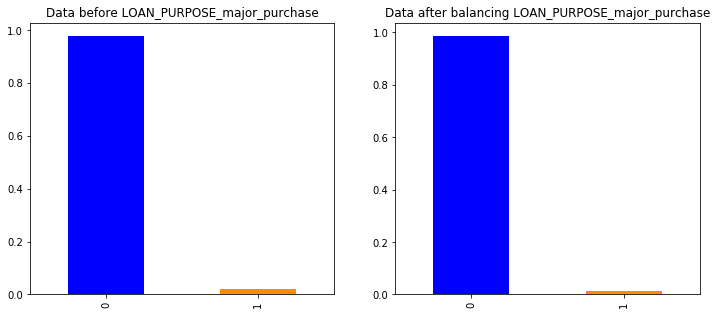

In [69]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before LOAN_PURPOSE_major_purchase")
pd.value_counts(df_loan_dummies['LOAN_PURPOSE_major_purchase'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing LOAN_PURPOSE_major_purchase")
pd.value_counts(X_train['LOAN_PURPOSE_major_purchase'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

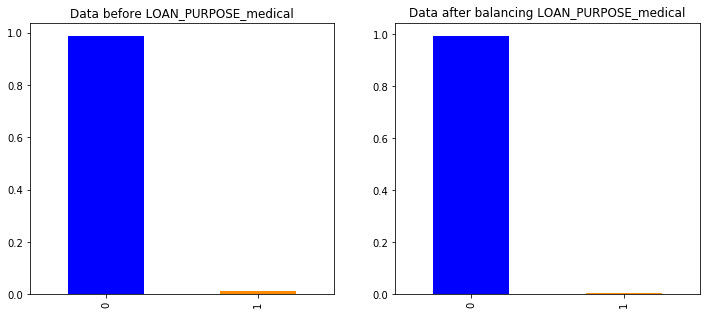

In [70]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before LOAN_PURPOSE_medical")
pd.value_counts(df_loan_dummies['LOAN_PURPOSE_medical'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing LOAN_PURPOSE_medical")
pd.value_counts(X_train['LOAN_PURPOSE_medical'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

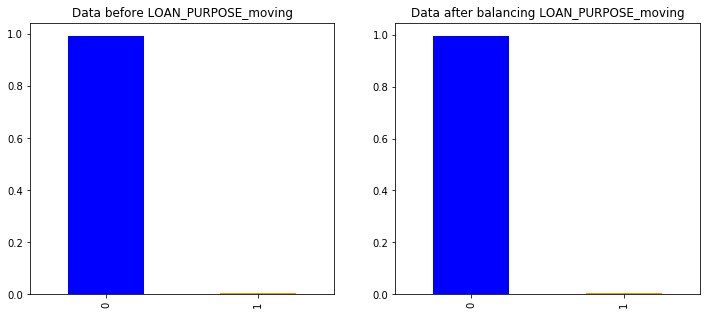

In [71]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before LOAN_PURPOSE_moving")
pd.value_counts(df_loan_dummies['LOAN_PURPOSE_moving'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing LOAN_PURPOSE_moving")
pd.value_counts(X_train['LOAN_PURPOSE_moving'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

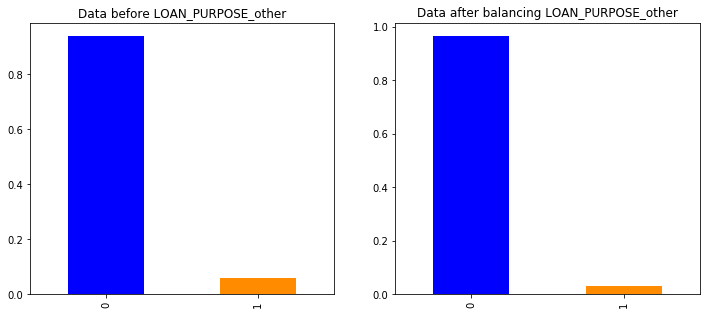

In [72]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before LOAN_PURPOSE_other")
pd.value_counts(df_loan_dummies['LOAN_PURPOSE_other'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing LOAN_PURPOSE_other")
pd.value_counts(X_train['LOAN_PURPOSE_other'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

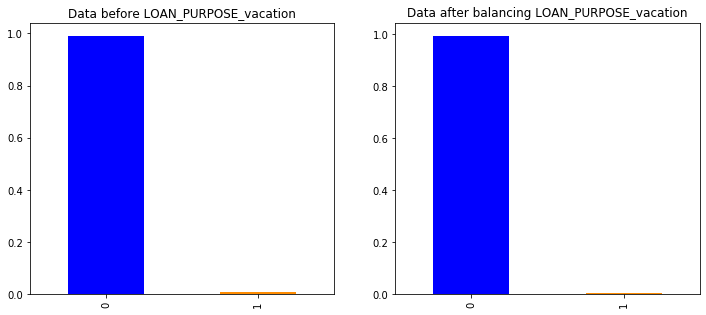

In [73]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before LOAN_PURPOSE_vacation")
pd.value_counts(df_loan_dummies['LOAN_PURPOSE_vacation'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing LOAN_PURPOSE_vacation")
pd.value_counts(X_train['LOAN_PURPOSE_vacation'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

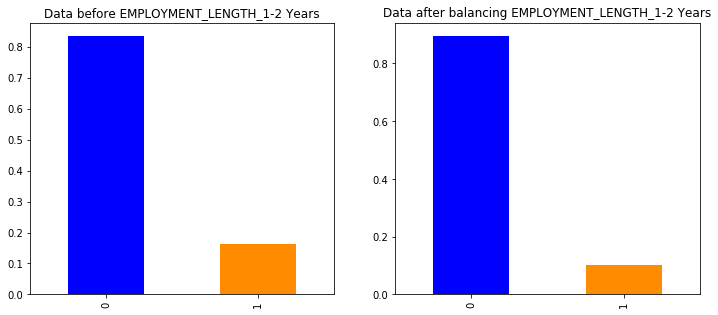

In [74]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before EMPLOYMENT_LENGTH_1-2 Years")
pd.value_counts(df_loan_dummies['EMPLOYMENT_LENGTH_1-2 Years'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing EMPLOYMENT_LENGTH_1-2 Years")
pd.value_counts(X_train['EMPLOYMENT_LENGTH_1-2 Years'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

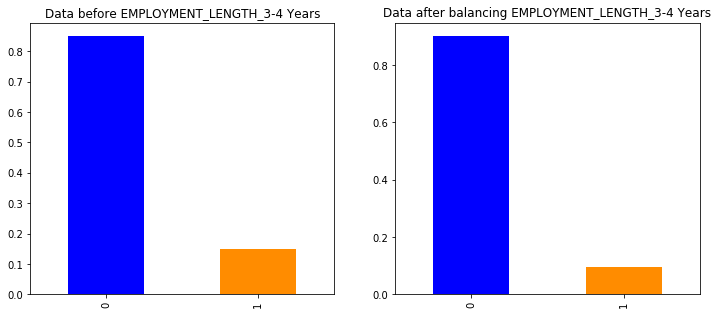

In [75]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before EMPLOYMENT_LENGTH_3-4 Years")
pd.value_counts(df_loan_dummies['EMPLOYMENT_LENGTH_3-4 Years'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing EMPLOYMENT_LENGTH_3-4 Years")
pd.value_counts(X_train['EMPLOYMENT_LENGTH_3-4 Years'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

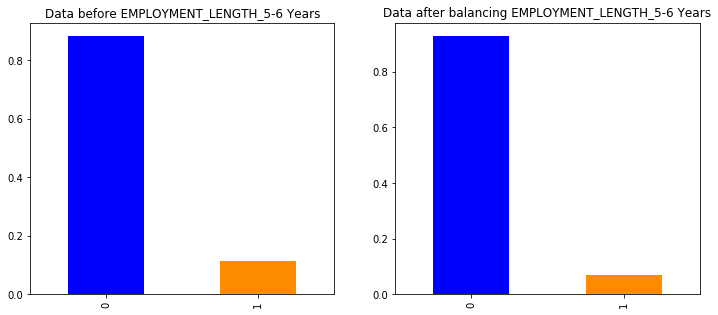

In [76]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before EMPLOYMENT_LENGTH_5-6 Years")
pd.value_counts(df_loan_dummies['EMPLOYMENT_LENGTH_5-6 Years'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing EMPLOYMENT_LENGTH_5-6 Years")
pd.value_counts(X_train['EMPLOYMENT_LENGTH_5-6 Years'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

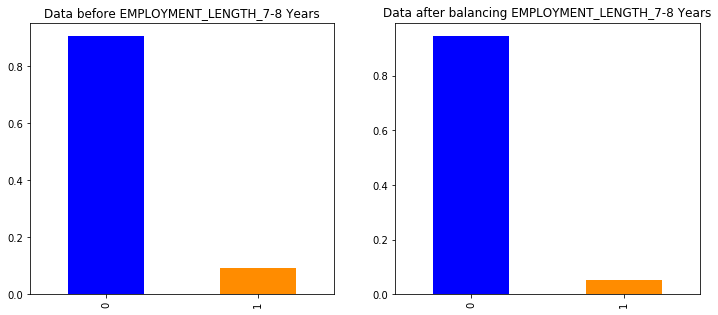

In [77]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before EMPLOYMENT_LENGTH_7-8 Years")
pd.value_counts(df_loan_dummies['EMPLOYMENT_LENGTH_7-8 Years'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing EMPLOYMENT_LENGTH_7-8 Years")
pd.value_counts(X_train['EMPLOYMENT_LENGTH_7-8 Years'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

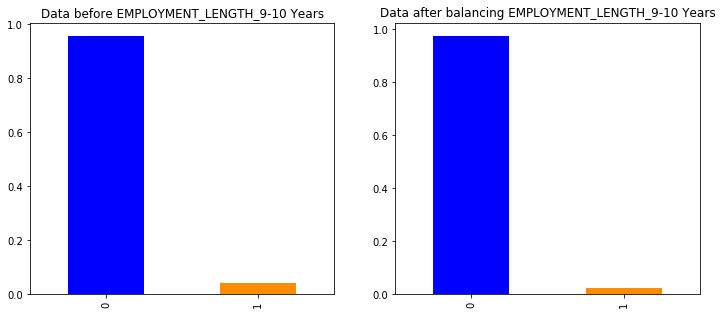

In [78]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before EMPLOYMENT_LENGTH_9-10 Years")
pd.value_counts(df_loan_dummies['EMPLOYMENT_LENGTH_9-10 Years'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing EMPLOYMENT_LENGTH_9-10 Years")
pd.value_counts(X_train['EMPLOYMENT_LENGTH_9-10 Years'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

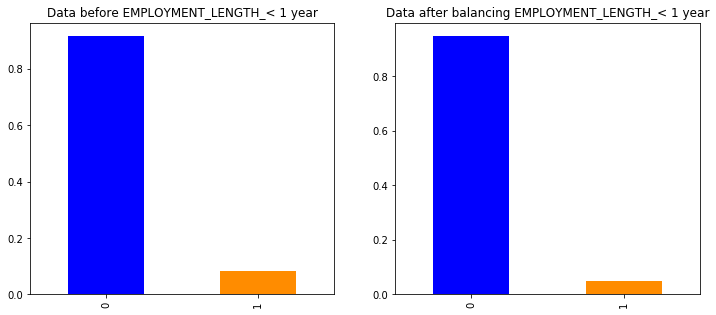

In [79]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before EMPLOYMENT_LENGTH_< 1 year")
pd.value_counts(df_loan_dummies['EMPLOYMENT_LENGTH_< 1 year'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing EMPLOYMENT_LENGTH_< 1 year")
pd.value_counts(X_train['EMPLOYMENT_LENGTH_< 1 year'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

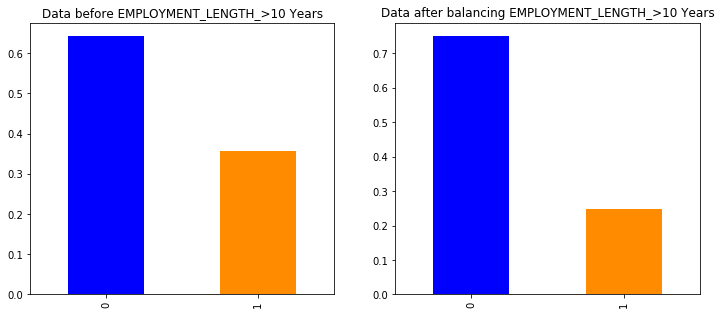

In [80]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before EMPLOYMENT_LENGTH_>10 Years")
pd.value_counts(df_loan_dummies['EMPLOYMENT_LENGTH_>10 Years'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing EMPLOYMENT_LENGTH_>10 Years")
pd.value_counts(X_train['EMPLOYMENT_LENGTH_>10 Years'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

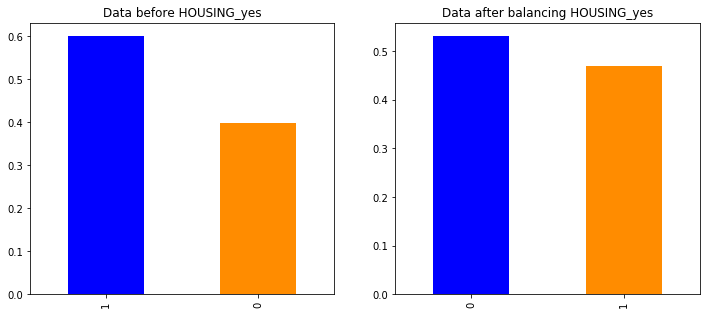

In [81]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before HOUSING_yes")
pd.value_counts(df_loan_dummies['HOUSING_yes'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing HOUSING_yes")
pd.value_counts(X_train['HOUSING_yes'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

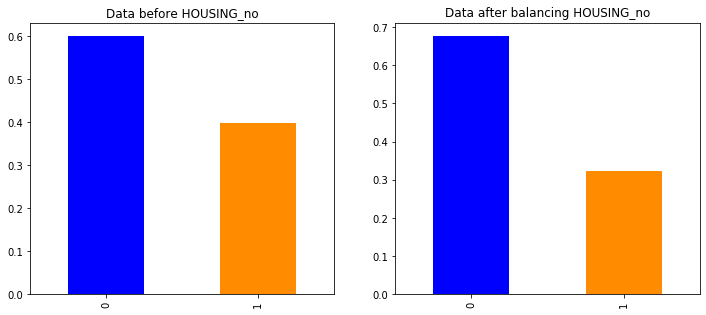

In [82]:
plt.figure(figsize=(25,25))
plt.subplot(1, 2, 1)
plt.title("Data before HOUSING_no")
pd.value_counts(df_loan_dummies['HOUSING_no'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])
plt.subplot(1, 2, 2)
plt.title("Data after balancing HOUSING_no")
pd.value_counts(X_train['HOUSING_no'].values,normalize=True).plot.bar(figsize=(12, 5),color=['blue','darkorange'])

In [83]:
relevantColumns=['LOAN_TERM_ 36 months', 'LOAN_TERM_ 60 months', 'LOAN_PURPOSE_car', 'LOAN_PURPOSE_credit_card', 'LOAN_PURPOSE_debt_consolidation', 'LOAN_PURPOSE_home_improvement', 'LOAN_PURPOSE_major_purchase', 'LOAN_PURPOSE_medical', 'LOAN_PURPOSE_moving', 'LOAN_PURPOSE_other', 'LOAN_PURPOSE_vacation', 'EMPLOYMENT_LENGTH_1-2 Years', 'EMPLOYMENT_LENGTH_3-4 Years', 'EMPLOYMENT_LENGTH_5-6 Years', 'EMPLOYMENT_LENGTH_7-8 Years', 'EMPLOYMENT_LENGTH_9-10 Years', 'EMPLOYMENT_LENGTH_< 1 year', 'EMPLOYMENT_LENGTH_>10 Years', 'HOUSING_no', 'HOUSING_yes','DEFAULT']

Text(0.5, 1, 'correlation heat map')

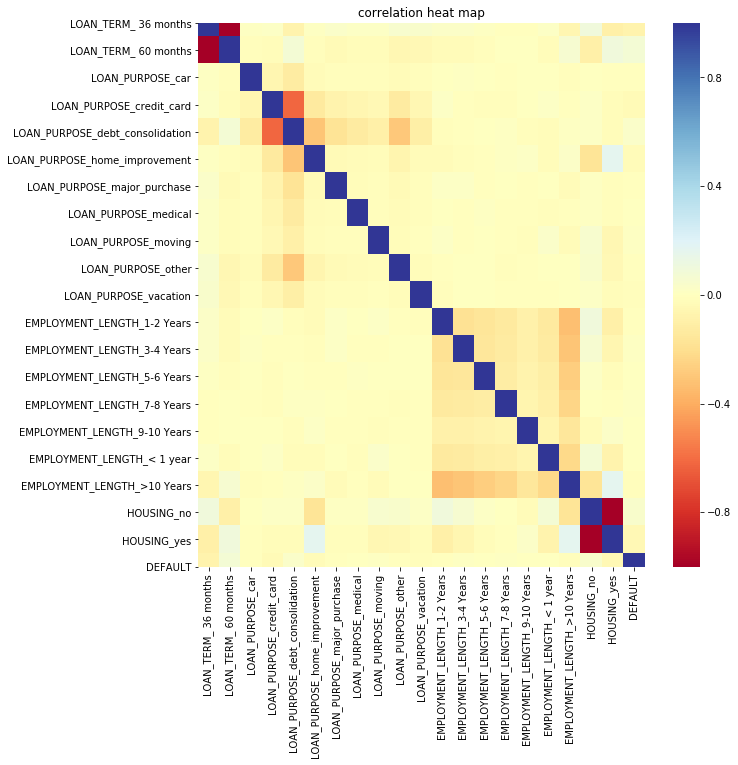

In [84]:
plt.figure(figsize=(10,10))
sns.set_style()
corr = df_loan_dummies[relevantColumns].corr()
sns.heatmap(corr,cmap="RdYlBu",vmin=-1,vmax=1)
plt.title("correlation heat map")

# 9. Training & Evaluating different machine learning classification models

## 9.1. K-Nearest Neighbors

### 9.1.1 Training a Predictive Model

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

### 9.1.2 Evaluating the Model Accuracy

In [86]:
print("Accuracy on training set:", "{:.2%}".format(knn.score(X_train, y_train)))
print("Accuracy on test set:", "{:.2%}".format(knn.score(X_test, y_test)))
print('\n accuracy:')
print('---------------')
acc1=knn.score(X_test, y_test)
print(acc1)

Accuracy on training set: 75.50%
Accuracy on test set: 63.78%

 accuracy:
---------------
0.6378181818181818


### 9.1.3 Confusion Matrix

In [87]:
y_pred1 = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_true=y_test, y_pred=y_pred1)
cmDf1=pd.DataFrame(cm1, index=knn.classes_, columns=knn.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf1)


Confusion Matrix
-------------------
      0     1
0  4913  2493
1   495   349


In [88]:
print("\033[1m The result is telling us that we have: ",(cm1[0,0]+cm1[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm1[0,1]+cm1[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm1.sum()))

 The result is telling us that we have:  5262 correct predictions.
 The result is telling us that we have:  2988 incorrect predictions.
 We have a total predictions of:  8250


### 9.1.4 Classification Report

In [89]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, y_pred1))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.91      0.66      0.77      7406
           1       0.12      0.41      0.19       844

    accuracy                           0.64      8250
   macro avg       0.52      0.54      0.48      8250
weighted avg       0.83      0.64      0.71      8250



### 9.1.5 Precision, Recall and Log Loss

In [90]:
per1=metrics.precision_score(y_test, y_pred1)
rec1=metrics.recall_score(y_test, y_pred1)
log1=metrics.log_loss(y_test, y_pred1)
print("\033[1m Precision of the model:", "{:.2%}".format(per1))
print("\033[1m Recall of the model:", "{:.2%}".format(rec1))
print("\033[1m Log Loss of the model:", round(log1,3))

 Precision of the model: 12.28%
 Recall of the model: 41.35%
 Log Loss of the model: 12.51


### 9.1.6 The ROC Curve

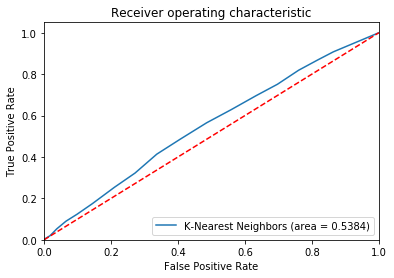

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc1 = roc_auc_score(y_test, y_pred1)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='K-Nearest Neighbors (area = %0.4f)' % roc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 9.1.7 F1-Score and ROC AUC

In [92]:
fs1=metrics.f1_score(y_test, y_pred1)
print("\033[1m The class 1 f1-score is:", "{:.4%}".format(fs1))
print("\033[1m The Model ROC AUC is:", "{:.4%}".format(roc1))

 The class 1 f1-score is: 18.9365%
 The Model ROC AUC is: 53.8444%


## 9.2. Logistic Regression

### 9.2.1 Training a Predictive Model

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1, random_state=47)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=47, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 9.2.2 Evaluating the Model Accuracy

In [94]:
print("Accuracy on training set:", "{:.2%}".format(logreg.score(X_train, y_train)))
print("Accuracy on test set:", "{:.2%}".format(logreg.score(X_test, y_test)))
print('\n accuracy:')
print('---------------')
acc2=logreg.score(X_test, y_test)
print(acc2)

Accuracy on training set: 61.95%
Accuracy on test set: 51.03%

 accuracy:
---------------
0.5103030303030303


### 9.2.3 Confusion Matrix

In [95]:
y_pred2 = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred2)
cmDf2=pd.DataFrame(cm2, index=logreg.classes_, columns=logreg.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf2)


Confusion Matrix
-------------------
      0     1
0  3591  3815
1   225   619


In [96]:
print("\033[1m The result is telling us that we have: ",(cm2[0,0]+cm2[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm2[0,1]+cm2[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm2.sum()))

 The result is telling us that we have:  4210 correct predictions.
 The result is telling us that we have:  4040 incorrect predictions.
 We have a total predictions of:  8250


### 9.2.4 Classification Report

In [97]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, y_pred2))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7406
           1       0.14      0.73      0.23       844

    accuracy                           0.51      8250
   macro avg       0.54      0.61      0.44      8250
weighted avg       0.86      0.51      0.60      8250



### 9.2.5 Precision, Recall and Log Loss

In [98]:
per2=metrics.precision_score(y_test, y_pred2)
rec2=metrics.recall_score(y_test, y_pred2)
log2=metrics.log_loss(y_test, y_pred2)
print("\033[1m Precision of the model:", "{:.2%}".format(per2))
print("\033[1m Recall of the model:", "{:.2%}".format(rec2))
print("\033[1m Log Loss of the model:", round(log2,3))

 Precision of the model: 13.96%
 Recall of the model: 73.34%
 Log Loss of the model: 16.914


### 9.2.6 The ROC Curve

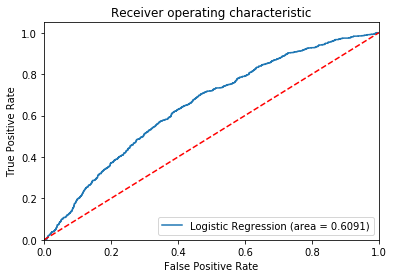

In [99]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc2 = roc_auc_score(y_test, y_pred2)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % roc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 9.2.7 F1-Score and ROC AUC

In [100]:
fs2=metrics.f1_score(y_test, y_pred2)
print("\033[1m The class 1 f1-score is:", "{:.4%}".format(fs2))
print("\033[1m The Model ROC AUC is:", "{:.4%}".format(roc2))

 The class 1 f1-score is: 23.4559%
 The Model ROC AUC is: 60.9145%


## 9.3. Support Vector Machine

### 9.3.1 Training a Predictive Model

In [101]:
from sklearn.svm import SVC
svc = SVC(probability=True, C=0.1, gamma=0.001, random_state=47)
svc.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=47, shrinking=True, tol=0.001,
    verbose=False)

### 9.3.2 Evaluating the Model Accuracy

In [102]:
print("Accuracy on training set:", "{:.2%}".format(svc.score(X_train, y_train)))
print("Accuracy on test set:", "{:.2%}".format(svc.score(X_test, y_test)))
print('\n accuracy:')
print('---------------')
acc3=svc.score(X_test, y_test)
print(acc3)

Accuracy on training set: 95.46%
Accuracy on test set: 44.51%

 accuracy:
---------------
0.4450909090909091


### 9.3.3 Confusion Matrix

In [103]:
y_pred3 = svc.predict(X_test)
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_true=y_test, y_pred=y_pred3)
cmDf3=pd.DataFrame(cm3, index=svc.classes_, columns=svc.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf3)


Confusion Matrix
-------------------
      0     1
0  3121  4285
1   293   551


In [104]:
print("\033[1m The result is telling us that we have: ",(cm3[0,0]+cm3[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm3[0,1]+cm3[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm3.sum()))

 The result is telling us that we have:  3672 correct predictions.
 The result is telling us that we have:  4578 incorrect predictions.
 We have a total predictions of:  8250


### 9.3.4 Classification Report

In [105]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, y_pred3))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.91      0.42      0.58      7406
           1       0.11      0.65      0.19       844

    accuracy                           0.45      8250
   macro avg       0.51      0.54      0.39      8250
weighted avg       0.83      0.45      0.54      8250



### 9.3.5 Precision, Recall and Log Loss

In [106]:
per3=metrics.precision_score(y_test, y_pred3)
rec3=metrics.recall_score(y_test, y_pred3)
log3=metrics.log_loss(y_test, y_pred3)
print("\033[1m Precision of the model:", "{:.2%}".format(per3))
print("\033[1m Recall of the model:", "{:.2%}".format(rec3))
print("\033[1m Log Loss of the model:", round(log3,3))

 Precision of the model: 11.39%
 Recall of the model: 65.28%
 Log Loss of the model: 19.166


### 9.3.6 The ROC Curve

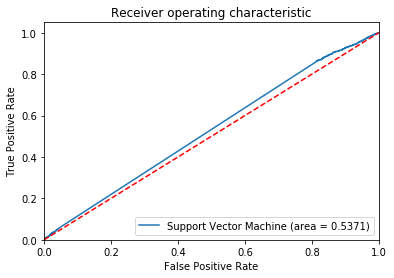

In [107]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc3 = roc_auc_score(y_test, y_pred3)
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.4f)' % roc3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 9.3.7 F1-Score and ROC AUC

In [108]:
fs3=metrics.f1_score(y_test, y_pred3)
print("\033[1m The class 1 f1-score is:", "{:.4%}".format(fs3))
print("\033[1m The Model ROC AUC is:", "{:.4%}".format(roc3))

 The class 1 f1-score is: 19.4014%
 The Model ROC AUC is: 53.7129%


# 9.4. Decision Trees

### 9.4.1 Training a Predictive Model

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
dt = DecisionTreeClassifier(max_depth=1, random_state=47)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=47, splitter='best')

### 9.4.2 Evaluating the Model Accuracy

In [110]:
print("Accuracy on training set:", "{:.2%}".format(dt.score(X_train, y_train)))
print("Accuracy on test set:", "{:.2%}".format(dt.score(X_test, y_test)))
print('\n accuracy:')
print('---------------')
acc4=dt.score(X_test, y_test)
print(acc4)

Accuracy on training set: 65.28%
Accuracy on test set: 47.24%

 accuracy:
---------------
0.4723636363636364


### 9.4.3 Confusion Matrix

In [111]:
y_pred4 = dt.predict(X_test)
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_true=y_test, y_pred=y_pred4)
cmDf4=pd.DataFrame(cm4, index=dt.classes_, columns=dt.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf4)


Confusion Matrix
-------------------
      0     1
0  3212  4194
1   159   685


In [112]:
print("\033[1m The result is telling us that we have: ",(cm4[0,0]+cm4[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm4[0,1]+cm4[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm4.sum()))

 The result is telling us that we have:  3897 correct predictions.
 The result is telling us that we have:  4353 incorrect predictions.
 We have a total predictions of:  8250


### 9.4.4 Classification Report

In [113]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, y_pred4))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.95      0.43      0.60      7406
           1       0.14      0.81      0.24       844

    accuracy                           0.47      8250
   macro avg       0.55      0.62      0.42      8250
weighted avg       0.87      0.47      0.56      8250



### 9.4.5 Precision, Recall and Log Loss

In [114]:
per4=metrics.precision_score(y_test, y_pred4)
rec4=metrics.recall_score(y_test, y_pred4)
log4=metrics.log_loss(y_test, y_pred4)
print("\033[1m Precision of the model:", "{:.2%}".format(per4))
print("\033[1m Recall of the model:", "{:.2%}".format(rec4))
print("\033[1m Log Loss of the model:", round(log4,3))

 Precision of the model: 14.04%
 Recall of the model: 81.16%
 Log Loss of the model: 18.224


### 9.4.6 The ROC Curve

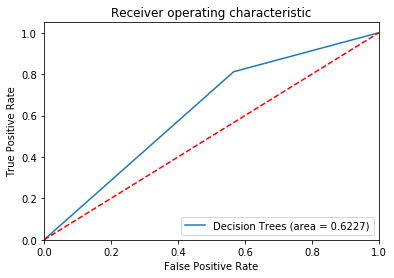

In [115]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc4 = roc_auc_score(y_test, y_pred4)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Trees (area = %0.4f)' % roc4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 9.4.7 F1-Score and ROC AUC

In [116]:
fs4=metrics.f1_score(y_test, y_pred4)
print("\033[1m The class 1 f1-score is:", "{:.4%}".format(fs4))
print("\033[1m The Model ROC AUC is:", "{:.4%}".format(roc4))

 The class 1 f1-score is: 23.9385%
 The Model ROC AUC is: 62.2657%


# 9.5. Random Forest

### 9.5.1 Training a Predictive Model

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=47)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=47, verbose=0,
                       warm_start=False)

### 9.5.2 Evaluating the Model Accuracy

In [118]:
print("Accuracy on training set:", "{:.2%}".format(rf.score(X_train, y_train)))
print("Accuracy on test set:", "{:.2%}".format(rf.score(X_test, y_test)))
print('\n accuracy:')
print('---------------')
acc5=rf.score(X_test, y_test)
print(acc5)

Accuracy on training set: 85.65%
Accuracy on test set: 82.21%

 accuracy:
---------------
0.822060606060606


### 9.5.3 Confusion Matrix

In [119]:
y_pred5 = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_true=y_test, y_pred=y_pred5)
cmDf5=pd.DataFrame(cm5, index=rf.classes_, columns=rf.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf5)


Confusion Matrix
-------------------
      0    1
0  6594  812
1   656  188


In [120]:
print("\033[1m The result is telling us that we have: ",(cm5[0,0]+cm5[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm5[0,1]+cm5[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm5.sum()))

 The result is telling us that we have:  6782 correct predictions.
 The result is telling us that we have:  1468 incorrect predictions.
 We have a total predictions of:  8250


### 9.5.4 Classification Report

In [121]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, y_pred5))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7406
           1       0.19      0.22      0.20       844

    accuracy                           0.82      8250
   macro avg       0.55      0.56      0.55      8250
weighted avg       0.84      0.82      0.83      8250



### 9.5.5 Precision, Recall and Log Loss

In [122]:
per5=metrics.precision_score(y_test, y_pred5)
rec5=metrics.recall_score(y_test, y_pred5)
log5=metrics.log_loss(y_test, y_pred5)
print("\033[1m Precision of the model:", "{:.2%}".format(per5))
print("\033[1m Recall of the model:", "{:.2%}".format(rec5))
print("\033[1m Log Loss of the model:", round(log5,3))

 Precision of the model: 18.80%
 Recall of the model: 22.27%
 Log Loss of the model: 6.146


### 9.5.6 The ROC Curve

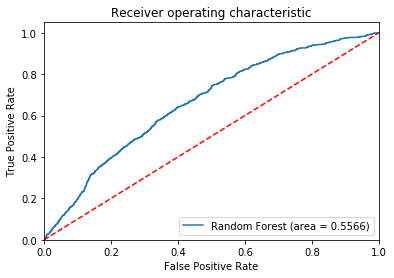

In [123]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc5 = roc_auc_score(y_test, y_pred5)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.4f)' % roc5)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 9.5.7 F1-Score and ROC AUC

In [124]:
fs5=metrics.f1_score(y_test, y_pred5)
print("\033[1m The class 1 f1-score is:", "{:.4%}".format(fs5))
print("\033[1m The Model ROC AUC is:", "{:.4%}".format(roc5))

 The class 1 f1-score is: 20.3905%
 The Model ROC AUC is: 55.6554%


# 9.6. Naïve Bayes

### 9.6.1 Training a Predictive Model

In [125]:
import sklearn.naive_bayes as nb
nbc = nb.GaussianNB()
nbc.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### 9.6.2 Evaluating the Model Accuracy

In [126]:
print("Accuracy on training set:", "{:.2%}".format(nbc.score(X_train, y_train)))
print("Accuracy on test set:", "{:.2%}".format(nbc.score(X_test, y_test)))
print('\n accuracy:')
print('---------------')
acc6=nbc.score(X_test, y_test)
print(acc6)

Accuracy on training set: 66.09%
Accuracy on test set: 51.52%

 accuracy:
---------------
0.5151515151515151


### 9.6.3 Confusion Matrix

In [127]:
y_pred6 = nbc.predict(X_test)
from sklearn.metrics import confusion_matrix
cm6 = confusion_matrix(y_true=y_test, y_pred=y_pred6)
cmDf6=pd.DataFrame(cm6, index=nbc.classes_, columns=nbc.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf6)


Confusion Matrix
-------------------
      0     1
0  3629  3777
1   223   621


In [128]:
print("\033[1m The result is telling us that we have: ",(cm6[0,0]+cm6[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm6[0,1]+cm6[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm6.sum()))

 The result is telling us that we have:  4250 correct predictions.
 The result is telling us that we have:  4000 incorrect predictions.
 We have a total predictions of:  8250


### 9.6.4 Classification Report

In [129]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, y_pred6))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.94      0.49      0.64      7406
           1       0.14      0.74      0.24       844

    accuracy                           0.52      8250
   macro avg       0.54      0.61      0.44      8250
weighted avg       0.86      0.52      0.60      8250



### 9.6.5 Precision, Recall and Log Loss

In [130]:
per6=metrics.precision_score(y_test, y_pred6)
rec6=metrics.recall_score(y_test, y_pred6)
log6=metrics.log_loss(y_test, y_pred6)
print("\033[1m Precision of the model:", "{:.2%}".format(per6))
print("\033[1m Recall of the model:", "{:.2%}".format(rec6))
print("\033[1m Log Loss of the model:", round(log6,3))

 Precision of the model: 14.12%
 Recall of the model: 73.58%
 Log Loss of the model: 16.746


### 9.6.6 The ROC Curve

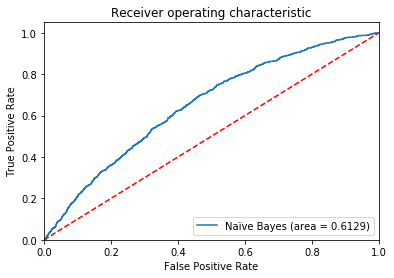

In [131]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc6 = roc_auc_score(y_test, y_pred6)
fpr, tpr, thresholds = roc_curve(y_test, nbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Naïve Bayes (area = %0.4f)' % roc6)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 9.6.7 F1-Score and ROC AUC

In [132]:
fs6=metrics.f1_score(y_test, y_pred6)
print("\033[1m The class 1 f1-score is:", "{:.4%}".format(fs6))
print("\033[1m The Model ROC AUC is:", "{:.4%}".format(roc6))

 The class 1 f1-score is: 23.6932%
 The Model ROC AUC is: 61.2895%


# 9.7. Gradient Boosting

### 9.7.1 Training a Predictive Model

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(max_depth=26, random_state=47)
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=26,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=47, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### 9.7.2 Evaluating the Model Accuracy

In [134]:
print("Accuracy on training set:", "{:.2%}".format(gb.score(X_train, y_train)))
print("Accuracy on test set:", "{:.2%}".format(gb.score(X_test, y_test)))
print('\n accuracy:')
print('---------------')
acc7=gb.score(X_test, y_test)
print(acc7)

Accuracy on training set: 100.00%
Accuracy on test set: 80.62%

 accuracy:
---------------
0.8061818181818182


### 9.7.3 Confusion Matrix

In [135]:
y_pred7 = gb.predict(X_test)
from sklearn.metrics import confusion_matrix
cm7 = confusion_matrix(y_true=y_test, y_pred=y_pred7)
cmDf7=pd.DataFrame(cm7, index=gb.classes_, columns=gb.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf7)


Confusion Matrix
-------------------
      0    1
0  6502  904
1   695  149


In [136]:
print("\033[1m The result is telling us that we have: ",(cm7[0,0]+cm7[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm7[0,1]+cm7[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm7.sum()))

 The result is telling us that we have:  6651 correct predictions.
 The result is telling us that we have:  1599 incorrect predictions.
 We have a total predictions of:  8250


### 9.7.4 Classification Report

In [137]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, y_pred7))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7406
           1       0.14      0.18      0.16       844

    accuracy                           0.81      8250
   macro avg       0.52      0.53      0.52      8250
weighted avg       0.83      0.81      0.82      8250



### 9.7.5 Precision, Recall and Log Loss

In [138]:
per7=metrics.precision_score(y_test, y_pred7)
rec7=metrics.recall_score(y_test, y_pred7)
log7=metrics.log_loss(y_test, y_pred7)
print("\033[1m Precision of the model:", "{:.2%}".format(per7))
print("\033[1m Recall of the model:", "{:.2%}".format(rec7))
print("\033[1m Log Loss of the model:", round(log7,3))

 Precision of the model: 14.15%
 Recall of the model: 17.65%
 Log Loss of the model: 6.694


### 9.7.6 The ROC Curve

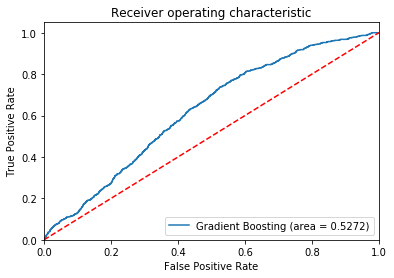

In [139]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc7 = roc_auc_score(y_test, y_pred7)
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.4f)' % roc7)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 9.7.7 F1-Score and ROC AUC

In [140]:
fs7=metrics.f1_score(y_test, y_pred7)
print("\033[1m The class 1 f1-score is:", "{:.4%}".format(fs7))
print("\033[1m The Model ROC AUC is:", "{:.4%}".format(roc7))

 The class 1 f1-score is: 15.7090%
 The Model ROC AUC is: 52.7239%


## 9.8. Extra Trees

### 9.8.1 Training a Predictive Model

In [141]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(max_depth=3, random_state=47)
et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=3, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=47, verbose=0,
                     warm_start=False)

### 9.8.2 Evaluating the Model Accuracy

In [142]:
print("Accuracy on training set:", "{:.2%}".format(et.score(X_train, y_train)))
print("Accuracy on test set:", "{:.2%}".format(et.score(X_test, y_test)))
print('\n accuracy:')
print('---------------')
acc8=et.score(X_test, y_test)
print(acc8)

Accuracy on training set: 83.66%
Accuracy on test set: 81.24%

 accuracy:
---------------
0.8123636363636364


### 9.8.3 Confusion Matrix

In [143]:
y_pred8 = et.predict(X_test)
from sklearn.metrics import confusion_matrix
cm8 = confusion_matrix(y_true=y_test, y_pred=y_pred8)
cmDf8=pd.DataFrame(cm8, index=et.classes_, columns=et.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf8)


Confusion Matrix
-------------------
      0    1
0  6493  913
1   635  209


In [144]:
print("\033[1m The result is telling us that we have: ",(cm8[0,0]+cm8[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm8[0,1]+cm8[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm8.sum()))

 The result is telling us that we have:  6702 correct predictions.
 The result is telling us that we have:  1548 incorrect predictions.
 We have a total predictions of:  8250


### 9.8.4 Classification Report

In [145]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, y_pred8))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      7406
           1       0.19      0.25      0.21       844

    accuracy                           0.81      8250
   macro avg       0.55      0.56      0.55      8250
weighted avg       0.84      0.81      0.82      8250



### 9.8.5 Precision, Recall and Log Loss

In [146]:
per8=metrics.precision_score(y_test, y_pred8)
rec8=metrics.recall_score(y_test, y_pred8)
log8=metrics.log_loss(y_test, y_pred8)
print("\033[1m Precision of the model:", "{:.2%}".format(per8))
print("\033[1m Recall of the model:", "{:.2%}".format(rec8))
print("\033[1m Log Loss of the model:", round(log8,3))

 Precision of the model: 18.63%
 Recall of the model: 24.76%
 Log Loss of the model: 6.481


### 9.8.6 The ROC Curve

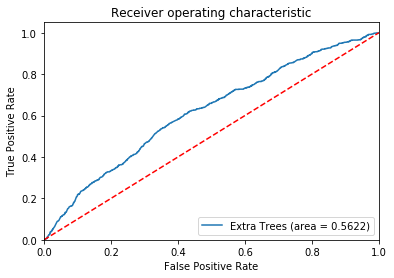

In [147]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc8 = roc_auc_score(y_test, y_pred8)
fpr, tpr, thresholds = roc_curve(y_test, et.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Extra Trees (area = %0.4f)' % roc8)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 9.8.7 F1-Score and ROC AUC

In [148]:
fs8=metrics.f1_score(y_test, y_pred8)
print("\033[1m The class 1 f1-score is:", "{:.4%}".format(fs8))
print("\033[1m The Model ROC AUC is:", "{:.4%}".format(roc8))

 The class 1 f1-score is: 21.2614%
 The Model ROC AUC is: 56.2176%


## 9.9. XGBoost

### 9.9.1 Training a Predictive Model

In [149]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]
from xgboost import XGBClassifier
xg = XGBClassifier(max_depth=14, random_state=47)
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=47, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 9.9.2 Evaluating the Model Accuracy

In [150]:
print("Accuracy on training set:", "{:.2%}".format(xg.score(X_train, y_train)))
print("Accuracy on test set:", "{:.2%}".format(xg.score(X_test, y_test)))
print('\n accuracy:')
print('---------------')
acc9=xg.score(X_test, y_test)
print(acc9)

Accuracy on training set: 100.00%
Accuracy on test set: 88.29%

 accuracy:
---------------
0.8829090909090909


### 9.9.3 Confusion Matrix

In [151]:
y_pred9 = xg.predict(X_test)
from sklearn.metrics import confusion_matrix
cm9 = confusion_matrix(y_true=y_test, y_pred=y_pred9)
cmDf9=pd.DataFrame(cm9, index=xg.classes_, columns=xg.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf9)


Confusion Matrix
-------------------
      0    1
0  7232  174
1   792   52


In [152]:
print("\033[1m The result is telling us that we have: ",(cm9[0,0]+cm9[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm9[0,1]+cm9[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm9.sum()))

 The result is telling us that we have:  7284 correct predictions.
 The result is telling us that we have:  966 incorrect predictions.
 We have a total predictions of:  8250


### 9.9.4 Classification Report

In [153]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, y_pred9))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7406
           1       0.23      0.06      0.10       844

    accuracy                           0.88      8250
   macro avg       0.57      0.52      0.52      8250
weighted avg       0.83      0.88      0.85      8250



### 9.9.5 Precision, Recall and Log Loss

In [154]:
per9=metrics.precision_score(y_test, y_pred9)
rec9=metrics.recall_score(y_test, y_pred9)
log9=metrics.log_loss(y_test, y_pred9)
print("\033[1m Precision of the model:", "{:.2%}".format(per9))
print("\033[1m Recall of the model:", "{:.2%}".format(rec9))
print("\033[1m Log Loss of the model:", round(log9,3))

 Precision of the model: 23.01%
 Recall of the model: 6.16%
 Log Loss of the model: 4.044


### 9.9.6 The ROC Curve

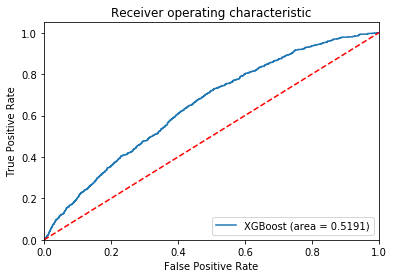

In [155]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc9 = roc_auc_score(y_test, y_pred9)
fpr, tpr, thresholds = roc_curve(y_test, xg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.4f)' % roc9)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 9.9.7 F1-Score and ROC AUC

In [156]:
fs9=metrics.f1_score(y_test, y_pred9)
print("\033[1m The class 1 f1-score is:", "{:.4%}".format(fs9))
print("\033[1m The Model ROC AUC is:", "{:.4%}".format(roc9))

 The class 1 f1-score is: 9.7196%
 The Model ROC AUC is: 51.9058%


## 9.10. AdaBoost

### 9.10.1 Training a Predictive Model

In [157]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier(n_estimators=1, random_state=47)
ad.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1, random_state=47)

### 9.10.2 Evaluating the Model Accuracy

In [158]:
print("Accuracy on training set:", "{:.2%}".format(ad.score(X_train, y_train)))
print("Accuracy on test set:", "{:.2%}".format(ad.score(X_test, y_test)))
print('\n accuracy:')
print('---------------')
acc10=ad.score(X_test, y_test)
print(acc10)

Accuracy on training set: 65.28%
Accuracy on test set: 47.24%

 accuracy:
---------------
0.4723636363636364


### 9.10.3 Confusion Matrix

In [159]:
y_pred10 = ad.predict(X_test)
from sklearn.metrics import confusion_matrix
cm10 = confusion_matrix(y_true=y_test, y_pred=y_pred10)
cmDf10=pd.DataFrame(cm10, index=ad.classes_, columns=ad.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf10)


Confusion Matrix
-------------------
      0     1
0  3212  4194
1   159   685


In [160]:
print("\033[1m The result is telling us that we have: ",(cm10[0,0]+cm10[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm10[0,1]+cm10[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm10.sum()))

 The result is telling us that we have:  3897 correct predictions.
 The result is telling us that we have:  4353 incorrect predictions.
 We have a total predictions of:  8250


### 9.10.4 Classification Report

In [161]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, y_pred10))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.95      0.43      0.60      7406
           1       0.14      0.81      0.24       844

    accuracy                           0.47      8250
   macro avg       0.55      0.62      0.42      8250
weighted avg       0.87      0.47      0.56      8250



### 9.10.5 Precision, Recall and Log Loss

In [162]:
per10=metrics.precision_score(y_test, y_pred10)
rec10=metrics.recall_score(y_test, y_pred10)
log10=metrics.log_loss(y_test, y_pred10)
print("\033[1m Precision of the model:", "{:.2%}".format(per10))
print("\033[1m Recall of the model:", "{:.2%}".format(rec10))
print("\033[1m Log Loss of the model:", round(log10,3))

 Precision of the model: 14.04%
 Recall of the model: 81.16%
 Log Loss of the model: 18.224


### 9.10.6 The ROC Curve

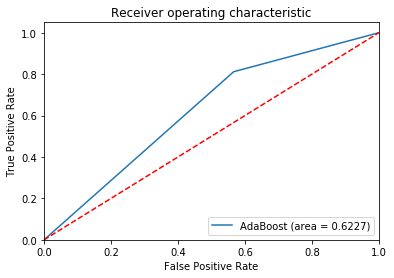

In [163]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc10 = roc_auc_score(y_test, y_pred10)
fpr, tpr, thresholds = roc_curve(y_test, ad.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (area = %0.4f)' % roc10)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 9.10.7 F1-Score and ROC AUC

In [164]:
fs10=metrics.f1_score(y_test, y_pred10)
print("\033[1m The class 1 f1-score is:", "{:.4%}".format(fs10))
print("\033[1m The Model ROC AUC is:", "{:.4%}".format(roc10))

 The class 1 f1-score is: 23.9385%
 The Model ROC AUC is: 62.2657%


# 10. Comparing several machine learning classification models

## 10.1 Comparing models

In [165]:
models = ['K-Nearest Neighbors','Logistic Regression', 
          'Support Vector Machine Classifier', 'Decision Tree Classifier',
          'Random Forest Classifier', 'Naïve Bayes Classifier',
          'Gradient Boosting Classifier','Extra Trees Classifier',
          'XGBoost Classifier','AdaBoost Classifier']
tests_f1score = [fs1, fs2, fs3, fs4, fs5, fs6, fs7, fs8, fs9, fs10]
tests_acc = [acc1, acc2, acc3, acc4, acc5, acc6, acc7, acc8, acc9, acc10]

In [166]:
compare_models = pd.DataFrame({ "Algorithms": models, "Tests f1-score": tests_f1score, "Tests Accuracy": tests_acc})
compare_models.sort_values(by = "Tests f1-score", ascending = False)

Algorithms  Tests f1-score  Tests Accuracy
3           Decision Tree Classifier        0.239385        0.472364
9                AdaBoost Classifier        0.239385        0.472364
5             Naïve Bayes Classifier        0.236932        0.515152
1                Logistic Regression        0.234559        0.510303
7             Extra Trees Classifier        0.212614        0.812364
4           Random Forest Classifier        0.203905        0.822061
2  Support Vector Machine Classifier        0.194014        0.445091
0                K-Nearest Neighbors        0.189365        0.637818
6       Gradient Boosting Classifier        0.157090        0.806182
8                 XGBoost Classifier        0.097196        0.882909

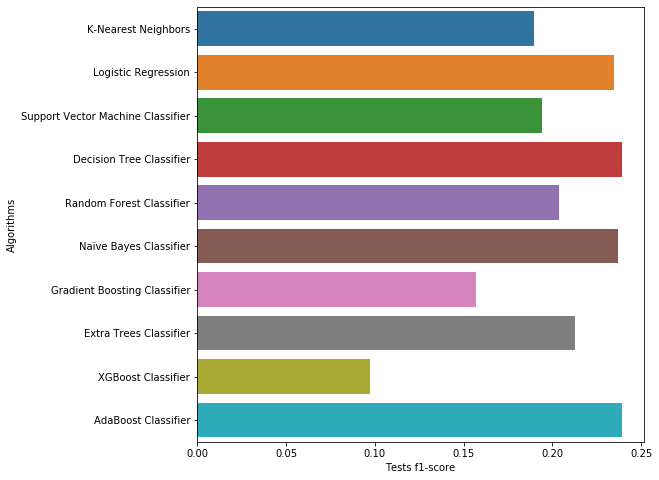

In [167]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests f1-score", y = "Algorithms", data = compare_models)
plt.show()

### From the above 10 machine learning models, we choose the Extra Trees Classifier which gave us the best results.

## 10.2 Feature Importance in the chosen model

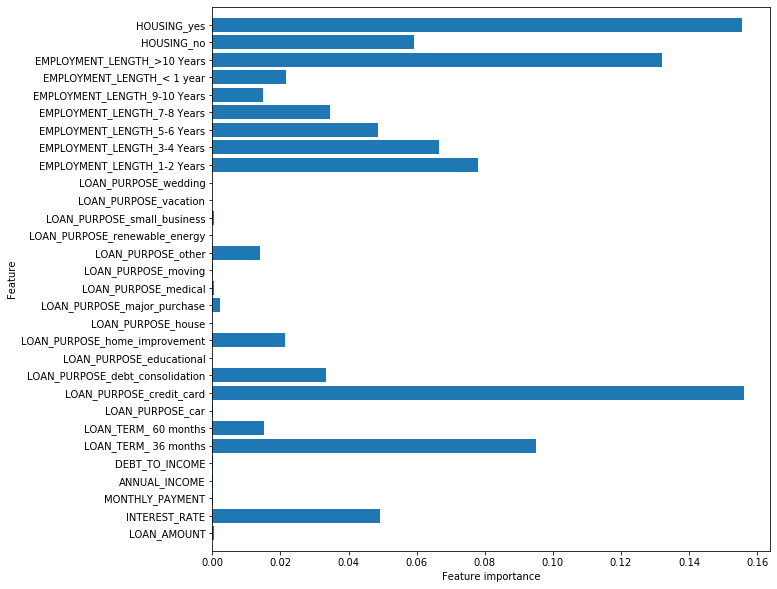

In [168]:
default_features = [x for i,x in enumerate(cols) if i!=30]

def plot_feature_importances_default(model):
    plt.figure(figsize=(10,10))
    n_features = len(cols)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), default_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_default(et)
plt.savefig('feature_importance')

# 11. Training & Evaluating different ensemble learning classification methods

## 11.1. Simple Averaging Approach

### 11.1.1 Training a Predictive Model

In [169]:
ET_clf = ExtraTreesClassifier(max_depth=3, random_state=47)
RF_clf = RandomForestClassifier(max_depth=5, random_state=47)
DT_clf = DecisionTreeClassifier(max_depth=1, random_state=47)

ET_clf.fit(X_train, y_train)
RF_clf.fit(X_train, y_train)
DT_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=47, splitter='best')

### 11.1.2 Evaluating the Model Accuracy

In [170]:
ET_pred = ET_clf.predict(X_test)
RF_pred = RF_clf.predict(X_test)
DT_pred = DT_clf.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, log_loss
averaged_preds = (ET_pred + RF_pred + DT_pred)//3
print('\n accuracy:')
print('---------------')
acc11=accuracy_score(y_test,averaged_preds)
print(acc11)


 accuracy:
---------------
0.8481212121212122


### 11.1.3 Confusion Matrix

In [171]:
averaged_preds = (ET_pred + RF_pred + DT_pred)//3
from sklearn.metrics import confusion_matrix
cm11 = confusion_matrix(y_true=y_test, y_pred=averaged_preds)
cmDf11=pd.DataFrame(cm11, index=DT_clf.classes_, columns=DT_clf.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf11)


Confusion Matrix
-------------------
      0    1
0  6866  540
1   713  131


In [172]:
print("\033[1m The result is telling us that we have: ",(cm11[0,0]+cm11[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm11[0,1]+cm11[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm11.sum()))

 The result is telling us that we have:  6997 correct predictions.
 The result is telling us that we have:  1253 incorrect predictions.
 We have a total predictions of:  8250


### 11.1.4 Classification Report

In [173]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, averaged_preds))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7406
           1       0.20      0.16      0.17       844

    accuracy                           0.85      8250
   macro avg       0.55      0.54      0.54      8250
weighted avg       0.83      0.85      0.84      8250



### 11.1.5 Precision, Recall and Log Loss

In [174]:
per11=metrics.precision_score(y_test, averaged_preds)
rec11=metrics.recall_score(y_test, averaged_preds)
log11=metrics.log_loss(y_test, averaged_preds)
print("\033[1m Precision of the model:", "{:.2%}".format(per11))
print("\033[1m Recall of the model:", "{:.2%}".format(rec11))
print("\033[1m Log Loss of the model:", round(log11,3))

 Precision of the model: 19.52%
 Recall of the model: 15.52%
 Log Loss of the model: 5.246


### 11.1.6 The ROC Curve

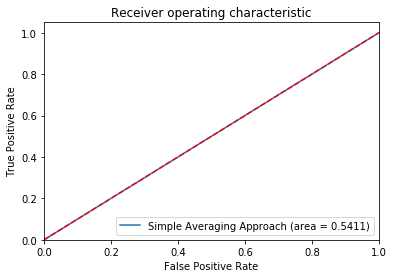

In [175]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc11 = roc_auc_score(y_test, averaged_preds)

average_proba = (ET_clf.predict_proba(X_test)[:,1]+ RF_clf.predict_proba(X_test)[:,1]+ DT_clf.predict_proba(X_test)[:,1])//3

fpr, tpr, thresholds = roc_curve(y_test, average_proba)
plt.figure()
plt.plot(fpr, tpr, label='Simple Averaging Approach (area = %0.4f)' % roc11)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 11.1.6 F1-Score and ROC AUC

In [176]:
fs11=metrics.f1_score(y_test, averaged_preds)
print("\033[1m The class 1 f1-score is:", "{:.4%}".format(fs11))
print("\033[1m The Model ROC AUC is:", "{:.4%}".format(roc11))

 The class 1 f1-score is: 17.2937%
 The Model ROC AUC is: 54.1150%


## 11.2. Voting/Stacking Classification

### 11.2.1 Training a Predictive Model

In [177]:
voting_clf = VotingClassifier(estimators=[('ET', ET_clf), ('RF', RF_clf), ('DT', DT_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('ET',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=3,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                    

### 11.2.2 Evaluating the Model Accuracy

In [178]:
print("Accuracy on training set:", "{:.2%}".format(voting_clf.score(X_train, y_train)))
print("Accuracy on test set:", "{:.2%}".format(voting_clf.score(X_test, y_test)))
print('\n accuracy:')
print('---------------')
acc12=voting_clf.score(X_test, y_test)
print(acc12)

Accuracy on training set: 76.94%
Accuracy on test set: 68.06%

 accuracy:
---------------
0.6806060606060607


### 11.2.3 Confusion Matrix

In [179]:
voting_preds = voting_clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm12 = confusion_matrix(y_true=y_test, y_pred=voting_preds)
cmDf12=pd.DataFrame(cm12, index=voting_clf.classes_, columns=voting_clf.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf12)


Confusion Matrix
-------------------
      0     1
0  5185  2221
1   414   430


### 11.2.4 Classification Report

In [180]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, voting_preds))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      7406
           1       0.16      0.51      0.25       844

    accuracy                           0.68      8250
   macro avg       0.54      0.60      0.52      8250
weighted avg       0.85      0.68      0.74      8250



### 11.2.5 Precision, Recall and Log Loss

In [181]:
per12=metrics.precision_score(y_test, voting_preds)
rec12=metrics.recall_score(y_test, voting_preds)
log12=metrics.log_loss(y_test, voting_preds)
print("\033[1m Precision of the model:", "{:.2%}".format(per12))
print("\033[1m Recall of the model:", "{:.2%}".format(rec12))
print("\033[1m Log Loss of the model:", round(log12,3))

 Precision of the model: 16.22%
 Recall of the model: 50.95%
 Log Loss of the model: 11.032


### 11.2.6 The ROC Curve

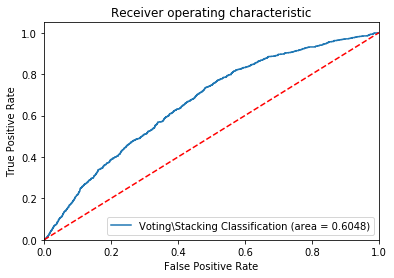

In [182]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc12 = roc_auc_score(y_test, voting_preds)
fpr, tpr, thresholds = roc_curve(y_test, voting_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Voting\Stacking Classification (area = %0.4f)' % roc12)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 11.2.7 F1-Score and ROC AUC

In [183]:
fs12=metrics.f1_score(y_test, voting_preds)
print("\033[1m The class 1 f1-score is:", "{:.4%}".format(fs12))
print("\033[1m The Model ROC AUC is:", "{:.4%}".format(roc12))

 The class 1 f1-score is: 24.6066%
 The Model ROC AUC is: 60.4793%


## 11.3. Bagging Classification

### 11.3.1 Training a Predictive Model

In [184]:
from sklearn.ensemble import BaggingClassifier
DT_Bagg = BaggingClassifier(base_estimator=DT_clf, n_estimators=50, random_state=47)
RF_Bagg = BaggingClassifier(base_estimator=RF_clf, n_estimators=50, random_state=47)
ET_Bagg = BaggingClassifier(base_estimator=ET_clf, n_estimators=50, random_state=47)

DT_Bagg.fit(X_train, y_train)
RF_Bagg.fit(X_train, y_train)
ET_Bagg.fit(X_train, y_train)


voting_Bagg = VotingClassifier(estimators=[('ET', ET_Bagg), ('RF', RF_Bagg), ('DT', DT_Bagg)], voting='soft')
voting_Bagg.fit(X_train, y_train)

VotingClassifier(estimators=[('ET',
                              BaggingClassifier(base_estimator=ExtraTreesClassifier(bootstrap=False,
                                                                                    ccp_alpha=0.0,
                                                                                    class_weight=None,
                                                                                    criterion='gini',
                                                                                    max_depth=3,
                                                                                    max_features='auto',
                                                                                    max_leaf_nodes=None,
                                                                                    max_samples=None,
                                                                                    min_impurity_decrease=0.0,
                                       

### 11.3.2 Evaluating the Model Accuracy

In [185]:
print("Accuracy on training set:", "{:.2%}".format(voting_Bagg.score(X_train, y_train)))
print("Accuracy on test set:", "{:.2%}".format(voting_Bagg.score(X_test, y_test)))
print('\n accuracy:')
print('---------------')
acc13=voting_Bagg.score(X_test, y_test)
print(acc13)

Accuracy on training set: 77.20%
Accuracy on test set: 68.08%

 accuracy:
---------------
0.6808484848484848


### 11.3.3 Confusion Matrix

In [186]:
voting_preds1 = voting_Bagg.predict(X_test)
from sklearn.metrics import confusion_matrix
cm13 = confusion_matrix(y_true=y_test, y_pred=voting_preds1)
cmDf13=pd.DataFrame(cm13, index=voting_Bagg.classes_, columns=voting_Bagg.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf13)


Confusion Matrix
-------------------
      0     1
0  5187  2219
1   414   430


In [187]:
print("\033[1m The result is telling us that we have: ",(cm13[0,0]+cm13[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm13[0,1]+cm13[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm13.sum()))

 The result is telling us that we have:  5617 correct predictions.
 The result is telling us that we have:  2633 incorrect predictions.
 We have a total predictions of:  8250


### 11.3.4 Classification Report

In [188]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, voting_preds1))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      7406
           1       0.16      0.51      0.25       844

    accuracy                           0.68      8250
   macro avg       0.54      0.60      0.52      8250
weighted avg       0.85      0.68      0.74      8250



### 11.3.5 Precision, Recall and Log Loss

In [189]:
per13=metrics.precision_score(y_test, voting_preds1)
rec13=metrics.recall_score(y_test, voting_preds1)
log13=metrics.log_loss(y_test, voting_preds1)
print("\033[1m Precision of the model:", "{:.2%}".format(per13))
print("\033[1m Recall of the model:", "{:.2%}".format(rec13))
print("\033[1m Log Loss of the model:", round(log13,3))

 Precision of the model: 16.23%
 Recall of the model: 50.95%
 Log Loss of the model: 11.023


### 11.3.6 The ROC Curve

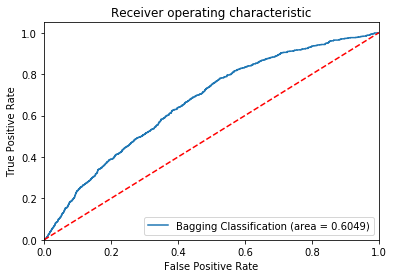

In [190]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc13 = roc_auc_score(y_test, voting_preds1)
fpr, tpr, thresholds = roc_curve(y_test, voting_Bagg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Bagging Classification (area = %0.4f)' % roc13)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 11.3.7 F1-Score and ROC AUC

In [191]:
fs13=metrics.f1_score(y_test, voting_preds1)
print("\033[1m The class 1 f1-score is:", "{:.4%}".format(fs13))
print("\033[1m The Model ROC AUC is:", "{:.4%}".format(roc13))

 The class 1 f1-score is: 24.6207%
 The Model ROC AUC is: 60.4928%


## 11.4. Boosting Classification

### 11.4.1 Training a Predictive Model

In [192]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]
from sklearn.ensemble import BaggingClassifier
Ada_Boost = AdaBoostClassifier(n_estimators=1, random_state=47)
XG_Boost = XGBClassifier(max_depth=14, random_state=47)
Grad_Boost = GradientBoostingClassifier(max_depth=26, random_state=47)

Ada_Boost.fit(X_train, y_train)
XG_Boost.fit(X_train, y_train)
Grad_Boost.fit(X_train, y_train)


voting_Boost = VotingClassifier(estimators=[('Grad', Grad_Boost), ('XG', XG_Boost), ('Ada', Ada_Boost)], voting='soft')
voting_Boost.fit(X_train, y_train)

VotingClassifier(estimators=[('Grad',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=26,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                           

### 11.4.2 Evaluating the Model Accuracy

In [193]:
print("Accuracy on training set:", "{:.2%}".format(voting_Boost.score(X_train, y_train)))
print("Accuracy on test set:", "{:.2%}".format(voting_Boost.score(X_test, y_test)))
print('\n accuracy:')
print('---------------')
acc14=voting_Boost.score(X_test, y_test)
print(acc14)

Accuracy on training set: 100.00%
Accuracy on test set: 83.14%

 accuracy:
---------------
0.8313939393939394


### 11.4.3 Confusion Matrix

In [194]:
voting_preds2 = voting_Boost.predict(X_test)
from sklearn.metrics import confusion_matrix
cm14 = confusion_matrix(y_test, voting_preds2)
cmDf14=pd.DataFrame(cm14, index=voting_Boost.classes_, columns=voting_Boost.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf14)


Confusion Matrix
-------------------
      0    1
0  6729  677
1   714  130


In [195]:
print("\033[1m The result is telling us that we have: ",(cm14[0,0]+cm14[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm14[0,1]+cm14[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm14.sum()))

 The result is telling us that we have:  6859 correct predictions.
 The result is telling us that we have:  1391 incorrect predictions.
 We have a total predictions of:  8250


### 11.4.4 Classification Report

In [196]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, voting_preds2))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      7406
           1       0.16      0.15      0.16       844

    accuracy                           0.83      8250
   macro avg       0.53      0.53      0.53      8250
weighted avg       0.83      0.83      0.83      8250



### 11.4.5 Precision, Recall and Log Loss

In [197]:
per14=metrics.precision_score(y_test, voting_preds2)
rec14=metrics.recall_score(y_test, voting_preds2)
log14=metrics.log_loss(y_test, voting_preds2)
print("\033[1m Precision of the model:", "{:.2%}".format(per14))
print("\033[1m Recall of the model:", "{:.2%}".format(rec14))
print("\033[1m Log Loss of the model:", round(log14,3))

 Precision of the model: 16.11%
 Recall of the model: 15.40%
 Log Loss of the model: 5.824


### 11.4.6 The ROC Curve

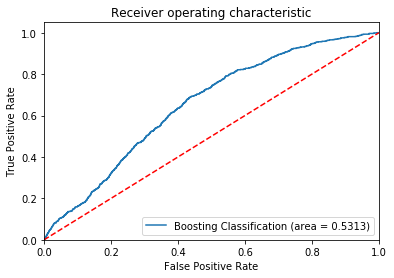

In [198]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc14 = roc_auc_score(y_test, voting_preds2)
fpr, tpr, thresholds = roc_curve(y_test, voting_Boost.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Boosting Classification (area = %0.4f)' % roc14)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 11.4.7 F1-Score and ROC AUC

In [199]:
fs14=metrics.f1_score(y_test, voting_preds2)
print("\033[1m The class 1 f1-score is:", "{:.4%}".format(fs14))
print("\033[1m The Model ROC AUC is:", "{:.4%}".format(roc14))

 The class 1 f1-score is: 15.7480%
 The Model ROC AUC is: 53.1308%


# 12. Comparing several ensemble learning classification methods

## 12.1 Comparing methods

In [200]:
methods = ['Simple Averaging Approach','Voting/Stacking Classification', 
          'Bagging Classification','Boosting Classification']
tests_f1score = [fs11, fs12, fs13, fs14]
tests_acc = [acc11, acc12, acc13, acc14]

In [201]:
compare_models = pd.DataFrame({ "Methods": methods, "Tests f1-score": tests_f1score, "Tests Accuracy": tests_acc})
compare_models.sort_values(by = "Tests f1-score", ascending = False)

Methods  Tests f1-score  Tests Accuracy
2          Bagging Classification        0.246207        0.680848
1  Voting/Stacking Classification        0.246066        0.680606
0       Simple Averaging Approach        0.172937        0.848121
3         Boosting Classification        0.157480        0.831394

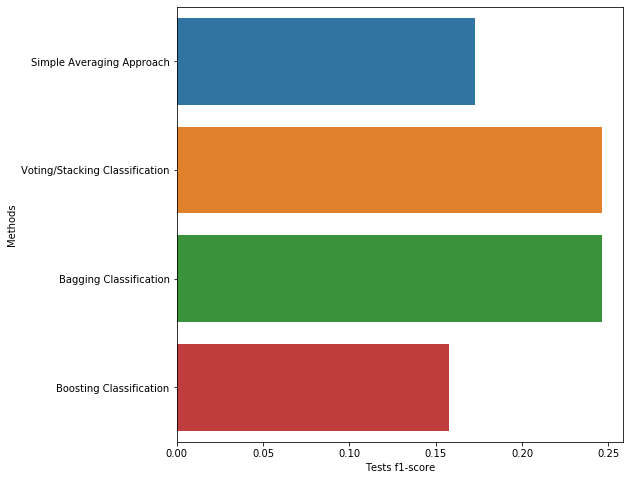

In [202]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests f1-score", y = "Methods", data = compare_models)
plt.show()

### From the above 4 ensemble learning methods, we choose the Simple Averaging Approach which gave us the best results.

# 13. Training & Evaluating deep learning classification model

## 13.1. Multi-Layer Perceptron

### 13.1.1  Training a Predictive Model

In [203]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=47)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=47, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### 13.1.2 Evaluating the Model Accuracy

In [204]:
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))
print('\n accuracy:')
print('---------------')
acc15=mlp.score(X_test, y_test)
print(acc15)

Accuracy on training set: 0.88
Accuracy on test set: 0.86

 accuracy:
---------------
0.8603636363636363


### 13.1.3 Confusion Matrix

In [205]:
y_pred15 = mlp.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm15 = confusion_matrix(y_test, y_pred15)
cmDf15=pd.DataFrame(cm15, index=mlp.classes_, columns=mlp.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf15)


Confusion Matrix
-------------------
      0    1
0  6965  441
1   711  133


In [206]:
print("\033[1m The result is telling us that we have: ",(cm15[0,0]+cm15[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm15[0,1]+cm15[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm15.sum()))

 The result is telling us that we have:  7098 correct predictions.
 The result is telling us that we have:  1152 incorrect predictions.
 We have a total predictions of:  8250


### 13.1.4 Classification Report

In [207]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, y_pred15))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7406
           1       0.23      0.16      0.19       844

    accuracy                           0.86      8250
   macro avg       0.57      0.55      0.56      8250
weighted avg       0.84      0.86      0.85      8250



### 13.1.5 Precision, Recall and Log Loss

In [208]:
per15=metrics.precision_score(y_test, y_pred15)
rec15=metrics.recall_score(y_test, y_pred15)
log15=metrics.log_loss(y_test, y_pred15)
print("\033[1m Precision of the model:", "{:.2%}".format(per15))
print("\033[1m Recall of the model:", "{:.2%}".format(rec15))
print("\033[1m Log Loss of the model:", round(log15,3))

 Precision of the model: 23.17%
 Recall of the model: 15.76%
 Log Loss of the model: 4.823


### 13.1.6 The ROC Curve

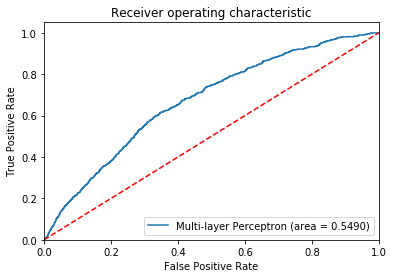

In [209]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc15 = roc_auc_score(y_test, y_pred15)
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Multi-layer Perceptron (area = %0.4f)' % roc15)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 13.1.7 F1-Score and ROC AUC

In [210]:
fs15=metrics.f1_score(y_test, y_pred15)
print("\033[1m The class 1 f1-score is:", "{:.4%}".format(fs15))
print("\033[1m The Model ROC AUC is:", "{:.4%}".format(roc15))

 The class 1 f1-score is: 18.7588%
 The Model ROC AUC is: 54.9018%


# 14. Choosing the best model

In [211]:
models = ['Extra Trees Classifier','Simple Averaging Approach', 
          'Multi-Layer Perceptron']
tests_f1score = [fs8, fs11, fs15]
tests_acc = [acc8, acc11, acc15]

In [212]:
compare_models = pd.DataFrame({ "Algorithms": models, "Tests f1-score": tests_f1score, "Tests Accuracy": tests_acc})
compare_models.sort_values(by = "Tests f1-score", ascending = False)

Algorithms  Tests f1-score  Tests Accuracy
0     Extra Trees Classifier        0.212614        0.812364
2     Multi-Layer Perceptron        0.187588        0.860364
1  Simple Averaging Approach        0.172937        0.848121

### From the above 3 models, we choose the Multi-Layer Perceptron which gave us the best results.

# 15. Predict+Evaluate on test set with chosen model

### 15.1.1 Multi-Layer Perceptron Model Fitting

In [213]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=47)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=47, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

### 15.1.2 Predicting the test set results and calculating the accuracy

In [214]:
print("\033[1m Accuracy of Multi-Layer Perceptron classifier on test set:", "{:.4f}".format(mlp.score(X_test, y_test)))

 Accuracy of Multi-Layer Perceptron classifier on test set: 0.8604


### 15.1.3 Cross Validation

Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our model.

In [215]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=47)
modelCV = mlp
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("\033[1m 10-fold cross validation average accuracy:", "{:.4f}".format((results.mean())))

 10-fold cross validation average accuracy: 0.7122


### 15.1.4 Confusion Matrix

In [216]:
y_pred15 = mlp.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm15 = confusion_matrix(y_test, y_pred15)
cmDf15=pd.DataFrame(cm15, index=mlp.classes_, columns=mlp.classes_)
print('\nConfusion Matrix')
print('-------------------')
print(cmDf15)
print('-------------------')
print("\033[1m The result is telling us that we have: ",(cm15[0,0]+cm15[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm15[0,1]+cm15[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm15.sum()))


Confusion Matrix
-------------------
      0    1
0  6965  441
1   711  133
-------------------
 The result is telling us that we have:  7098 correct predictions.
 The result is telling us that we have:  1152 incorrect predictions.
 We have a total predictions of:  8250


### 15.1.5 Classification Report

In [217]:
from sklearn.metrics import classification_report
print('\nclassification_report')
print('------------------------')
print(classification_report(y_test, y_pred15))


classification_report
------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7406
           1       0.23      0.16      0.19       844

    accuracy                           0.86      8250
   macro avg       0.57      0.55      0.56      8250
weighted avg       0.84      0.86      0.85      8250



### 15.1.6 Compute precision, recall, F-measure and support

To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [218]:
#calculate Accuracy, how often is the classifier correct?
print("\nAccuracy of MLP Classifier:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred15)))
print("Accuracy: Well, we got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred15)))
#calculate Precision
print("\nPrecision of MLP Classifier:", "{:.2%}".format(metrics.precision_score(y_test, y_pred15)))
print("Precision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our model predict a loan is about to default, that loan actually defaulted", "{:.2%}".format(metrics.precision_score(y_test, y_pred15)) ,"of the time.")
#calculate Recall
print("\nRecall of MLP Classifier:", "{:.2%}".format(metrics.recall_score(y_test, y_pred15)))
print("Recall: If there is a loan that defaulted present in the test set, our model can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred15)) ,"of the time.")


Accuracy of MLP Classifier: 86.04%
Accuracy: Well, we got a classification rate of 86.04%

Precision of MLP Classifier: 23.17%
Precision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our model predict a loan is about to default, that loan actually defaulted 23.17% of the time.

Recall of MLP Classifier: 15.76%
Recall: If there is a loan that defaulted present in the test set, our model can identify it 15.76% of the time.


### 15.1.6 The ROC Curve

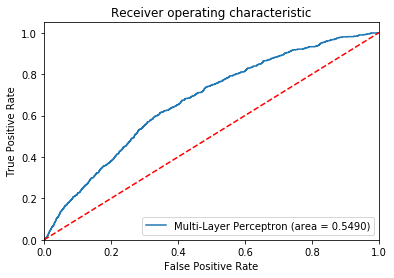

In [219]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
mlp_roc_auc = roc_auc_score(y_test, mlp.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label= 'Multi-Layer Perceptron (area = %0.4f)' % mlp_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 15.1.7 The First Layer Weights in Neural Network 

Finally, we plot a heat map of the first layer weights in a neural network learned on the default data set.

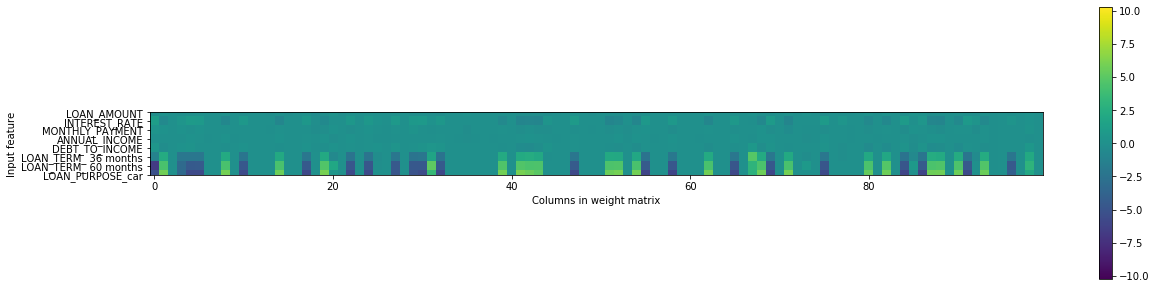

In [220]:
default_features = [x for i,x in enumerate(cols) if i!=30]
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), default_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

From the heat map, it is not easy to point out quickly that which feature (features) have relatively low weights compared to the other features.

# 16. Real time predictions

Now our model has been built, let me use it for real time predictions.

In [221]:
chosenModel = cols
chosenModel

Index(['LOAN_AMOUNT', 'INTEREST_RATE', 'MONTHLY_PAYMENT', 'ANNUAL_INCOME',
       'DEBT_TO_INCOME', 'LOAN_TERM_ 36 months', 'LOAN_TERM_ 60 months',
       'LOAN_PURPOSE_car', 'LOAN_PURPOSE_credit_card',
       'LOAN_PURPOSE_debt_consolidation', 'LOAN_PURPOSE_educational',
       'LOAN_PURPOSE_home_improvement', 'LOAN_PURPOSE_house',
       'LOAN_PURPOSE_major_purchase', 'LOAN_PURPOSE_medical',
       'LOAN_PURPOSE_moving', 'LOAN_PURPOSE_other',
       'LOAN_PURPOSE_renewable_energy', 'LOAN_PURPOSE_small_business',
       'LOAN_PURPOSE_vacation', 'LOAN_PURPOSE_wedding',
       'EMPLOYMENT_LENGTH_1-2 Years', 'EMPLOYMENT_LENGTH_3-4 Years',
       'EMPLOYMENT_LENGTH_5-6 Years', 'EMPLOYMENT_LENGTH_7-8 Years',
       'EMPLOYMENT_LENGTH_9-10 Years', 'EMPLOYMENT_LENGTH_< 1 year',
       'EMPLOYMENT_LENGTH_>10 Years', 'HOUSING_no', 'HOUSING_yes'],
      dtype='object')

In [222]:
df_loan_dummies['Probability_to_Default'] = mlp.predict_proba(df_loan_dummies[chosenModel])[:,1]

In [223]:
df_loan_dummies["LOAN_ID"] = df['LOAN_ID']
df_loan_dummies["TRUE"]=df_loan_dummies["DEFAULT"]
df_loan_dummies["PREDICTED"]=mlp.predict(X)
df_loan_dummies[["LOAN_ID","TRUE","PREDICTED", "Probability_to_Default"]].head(10)

LOAN_ID  TRUE  PREDICTED  Probability_to_Default
0   263591     1          0            6.695319e-02
1  1613916     0          0            1.681709e-14
2   818934     0          0            1.825302e-07
3  1606612     0          0            1.236462e-11
4  1639932     0          0            1.515137e-26
5   756884     1          1            1.000000e+00
6  1251123     0          0            5.428903e-12
7    15172     0          0            1.860244e-12
8  1503361     0          0            3.547558e-15
9   966958     0          0            1.652605e-22

In [224]:
df_loan_dummies.to_csv('Prob_to_Default.csv', index=False, encoding='utf-8')

# 17. Deployment

In [225]:
a_1  = int(input("Please enter the loan amount without comma-separated (for example, 20000):"))
a_2  = float(input("Please enter the loan rate in percentage (for example, 17.93):"))
a_3  = float(input("Please enter the monthly payment (for example, 342.94):"))
a_4  = float(input("Please enter the annual income without comma-separated (for example, 344304):"))
a_5  = float(input("Please enter the debt to income ratio in in percentage (for example, 18.47):"))
a_6  = int(input("Does the loan term is 36 months (1 if yes, 0 otherwise)? (for example, 0):"))
a_7  = int(input("Does the loan term is 60 months (1 if yes, 0 otherwise)? (for example, 1):"))
a_8  = int(input("Does the loan purpose is for a car (1 if yes, 0 otherwise)? (for example, 0):"))
a_9  = int(input("Does the loan purpose is for a credit card (1 if yes, 0 otherwise)? (for example, 0):"))
a_10 = int(input("Does the loan purpose is for a debt consolidation (1 if yes, 0 otherwise)? (for example, 1):"))
a_11 = int(input("Does the loan purpose is for an education (1 if yes, 0 otherwise)? (for example, 0):"))
a_12 = int(input("Does the loan purpose is for a home improvement (1 if yes, 0 otherwise)? (for example, 0):"))
a_13 = int(input("Does the loan purpose is for a house (1 if yes, 0 otherwise)? (for example, 0):"))
a_14 = int(input("Does the loan purpose is for a major purchase (1 if yes, 0 otherwise)? (for example, 0):"))
a_15 = int(input("Does the loan purpose is for a medical treatment (1 if yes, 0 otherwise)? (for example, 0):"))
a_16 = int(input("Does the loan purpose is for moving (1 if yes, 0 otherwise)? (for example, 0):"))
a_17 = int(input("Does the loan purpose is for other purpose (1 if yes, 0 otherwise)? (for example, 0):"))
a_18 = int(input("Does the loan purpose is for a renewable_energy (1 if yes, 0 otherwise)? (for example, 0):"))
a_19 = int(input("Does the loan purpose is for a small_business (1 if yes, 0 otherwise)? (for example, 0):"))
a_20 = int(input("Does the loan purpose is for a vacation (1 if yes, 0 otherwise)? (for example, 0):"))
a_21 = int(input("Does the loan purpose is for a wedding (1 if yes, 0 otherwise)? (for example, 0):"))
a_22 = int(input("Does the loan applicant's employment length range between 1 to 2 years (1 if yes, 0 otherwise)? (for example, 1):"))
a_23 = int(input("Does the loan applicant's employment length range between 3 to 4 years (1 if yes, 0 otherwise)? (for example, 0):"))
a_24 = int(input("Does the loan applicant's employment length range between 5 to 6 years (1 if yes, 0 otherwise)? (for example, 0):"))
a_25 = int(input("Does the loan applicant's employment length range between 7 to 8 years (1 if yes, 0 otherwise)? (for example, 0):"))
a_26 = int(input("Does the loan applicant's employment length range between 9 to 10 years (1 if yes, 0 otherwise)? (for example, 0):"))
a_27 = int(input("Is the loan applicant's employment lower than 1 year (1 if yes, 0 otherwise)? (for example, 0):"))
a_28 = int(input("Is the loan applicant's employment higher than 10 years (1 if yes, 0 otherwise)? (for example, 0):"))
a_29 = int(input("Does the loan applicant rent a home (1 if yes, 0 otherwise)? (for example, 0):"))
a_30 = int(input("Does the loan applicant own a home (1 if yes, 0 otherwise)? (for example, 1):"))
new_data = np.array([a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10,a_11,a_12,a_13,a_14,a_15,
                     a_16,a_17,a_18,a_19,a_20,a_21,a_22,a_23,a_24,a_25,a_26,a_27,a_28,
                     a_29,a_30]).reshape(1,-1)
new_pred=mlp.predict(new_data)
new_prob=mlp.predict_proba(new_data)
int(new_pred[0])
if int(new_pred[0]) == 1:
    print("\033[1m \nThe new loan is predicted to default (Don't give this applicant any money!!!!)\033[1m")
    print("\033[1m \nThe default probability of this applicant is", "{:.4%}".format(max(new_prob[0])))
else:
    print("\033[1m \nThe new loan is predicted not to default (Feel free to give this applicant a loan)\033[1m")
    print("\033[1m \nThe default probability of this applicant is", "{:.4%}".format(min(new_prob[0])))

Please enter the loan amount without comma-separated (for example, 20000):20000
Please enter the loan rate in percentage (for example, 17.93):17.93
Please enter the monthly payment (for example, 342.94):342.94
Please enter the annual income without comma-separated (for example, 344304):344304
Please enter the debt to income ratio in in percentage (for example, 18.47):18.47
Does the loan term is 36 months (1 if yes, 0 otherwise)? (for example, 0):0
Does the loan term is 60 months (1 if yes, 0 otherwise)? (for example, 1):1
Does the loan purpose is for a car (1 if yes, 0 otherwise)? (for example, 0):0
Does the loan purpose is for a credit card (1 if yes, 0 otherwise)? (for example, 0):0
Does the loan purpose is for a debt consolidation (1 if yes, 0 otherwise)? (for example, 1):1
Does the loan purpose is for an education (1 if yes, 0 otherwise)? (for example, 0):0
Does the loan purpose is for a home improvement (1 if yes, 0 otherwise)? (for example, 0):0
Does the loan purpose is for a hou